# 1. Perkenalan

- **Email**: [abdaztgl2@gmail.com](mailto:abdaztgl2@gmail.com)
- **LinkedIn**: [Abdul Aziz](https://www.linkedin.com/in/abdul-aziz-50a869185) 
- **GitHub**: [ab-dul-aziz](https://github.com/ab-dul-aziz)

# 2. Problem Breakdown

**A. Menentukan Pengaruh Faktor Fisik Terhadap Harga Properti**

1. Apakah jumlah kamar tidur dan kamar mandi berpengaruh signifikan terhadap harga properti?
2. Apakah ketersediaan tempat parkir mempengaruhi harga properti?
3. Bagaimana pengaruh luas tanah dan harga properti di beberapa region?
4. Bagaimana pengaruh luas bangunan dan harga properti di beberapa region?
5. Apakah semakin baru suatu properti maka harganya akan semakin mahal?

**B. Menentukan Pengaruh Faktor Geografis Terhadap Harga Properti**

6. Bagaimana distribusi harga properti di setiap region?
7. Apakah semakin dekat jarak properti ke Central Business District maka harganya akan semakin mahal?

**C. Menentukan Pengaruh Faktor Ekonomi Terhadap Harga Properti**

8. Apakah ada perbedaan harga yang signifikan antar tipe properti?
9. Bagaimana tren harga properti dari waktu ke waktu?
10. Apakah ada korelasi antara harga properti dengan banyaknya properti di daerah tersebut?

# 3. Data Loading

## 3.1. Data Exploration

In [1]:
# Import Libraries
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# Set panjang column
pd.set_option("display.max_columns", None)

In [3]:
# Data Loading
df_raw = pd.read_csv('melb_data_raw.csv')
df = df_raw
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Pada sampling data diatas terdapat beberapa poin yang perlu di notice
- Ada 2 kolom dengan code yang tidak diketahui maknannya yaitu `Type` dan `Method`. Oleh karena itu, saya perlu membuat dataframe baru yang berisi `code` dan `description` untuk keterangan masing-masing code. 
- Ada 2 kolom dengan yang memiliki missing value yaitu `BuildingArea` dan `YearBuilt`. Hal ini akan dicek lebih lanjut menggunakan method `.isna()`.
- Beberapa tipe data kolom tidak sesuai. Hal ini akan dicek lebih lanjut menggunakan method `.info()`.
- Beberapa nama kolom tidak self representatif dan perlu diganti.

## 3.2. Summary Data

In [4]:
# Cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Beberapa tipe data yang tidak sesuai adalah:
- `Date` -> datetime
- `Postcode` -> int
- `Bathroom` -> int
- `Car` -> int 
- `YearBuilt` -> int
- `PropertyCount` -> int

Beberapa kolom juga memiliki missing value seperti kolom `Car`, `BuildingArea`, `YearBuilt`, dan `CouncilArea`.

In [5]:
df.duplicated().sum()

0

Dari pengecekan data duplikat, juga terlihat bahwa sudah tidak ada data yang duplikat.

## 3.3. Membuat Tabel Bantu

Membuat tabel method_description dan type_description

**Method**
| code | description |
|-----:|-------------|
|S     |property sold|
|SP    |property sold prior|
|PI    |property passed in|
|PN    |sold prior not disclosed|
|SN    |sold not disclosed|
|NB    |no bid|
|VB    |vendor bid|
|W     |withdrawn prior to auction|
|SA    |sold after auction|
|SS    |sold after auction price not disclosed|
|N/A   |price or highest bid not available|

**Type**
| code | description |
|-----:|-------------|
|br    |bedroom| 
|h     |house,cottage,villa,semi,terrace|
|u     |unit, duplex| 
|t     |townhouse|
|dev site|development site|
|o res |other residential|

Untuk kolom `Method` dan `Type` nanti akan diganti dengan dataframe diatas menggunakan method `.merge()` untuk menjoinkan tabel.

## 3.4. Mengecek *Missing Value*

In [6]:
# Cek missing value
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

Kolom dengan dengan missing value ada `Car`, `BuildingArea`, `YearBuilt`, dan `CouncilArea`.
Untuk masing-masing missing value akan dihandle dengan cara yang berbeda.
- Car -> jumlah tempat parkir di sekitaran properti, ini bisa diisi dengan nilai modus karena tipe datanya adalah discrete.
- BuildingArea -> luas bangunan, ini bisa diisi dengan nilai mean, median ataupun modus karena tipe datanya adalah continuous.
- YearBuilt -> tahun rumah dibangun, ini bisa diisi dengan nilai modus karena tipe datanya adalah discrete.
- CouncilArea -> pemerintah di region tersebut, ini bisa diisi dengan nilai modus karena tipe datanya adalah string.

# 4. Data Cleaning

### 4.1. *Cleaning Header Name*

In [7]:
# Mengganti nama kolom
df.columns = df.columns.str.lower()
df = df.rename(columns={'sellerg':'agent_seller','bedroom2':'bedroom', 'car':'carspots','buildingarea':'building_area',
                        'yearbuilt':'year_built', 'councilarea':'council_area', 'regionname':'region_name', 'propertycount':'property_count',
                        'lattitude':'latitude', 'longtitude':'longitude'})


In [8]:
df.head()

,suburb,address,rooms,type,price,method,agent_seller,date,distance,postcode,bedroom,bathroom,carspots,landsize,building_area,year_built,council_area,latitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Nama kolom sudah berhasil diganti

## 4.2. Membuat Tabel Keterangan *Method* dan *Type*

In [9]:
# Create table method description
method_description = pd.DataFrame(({'S':'property sold', 
                                    'SP':'property sold prior', 
                                    'PI':'property passed in', 
                                    'PN':'sold prior not disclosed', 
                                    'SN':'sold not disclosed', 
                                    'NB':'no bid',
                                    'VB':'vendor bid',
                                    'W':'withdrawn prior to auction', 
                                    'SA':'sold after auction', 
                                    'SS':'sold after auction price not disclosed', 
                                    'N/A':'price or highest bid not available'}).items(), columns=['code', 'description'])

method_description

,code,description
0,S,property sold
1,SP,property sold prior
2,PI,property passed in
3,PN,sold prior not disclosed
4,SN,sold not disclosed
5,NB,no bid
6,VB,vendor bid
7,W,withdrawn prior to auction
8,SA,sold after auction
9,SS,sold after auction price not disclosed


Dataframe `method_description` berhasil dibuat.

In [10]:
# Create table type description
type_description = pd.DataFrame(({'br':'bedroom',
                                  'h':'house',
                                  'u':'unit, duplex',
                                  't':'townhouse',
                                  'dev site':'development site',
                                  'o res':'other residential'}).items(), columns=['code', 'description'])
type_description

,code,description
0,br,bedroom
1,h,house
2,u,"unit, duplex"
3,t,townhouse
4,dev site,development site
5,o res,other residential


Dataframe `type_description` berhasil dibuat.

## 4.2.1. Menggabungkan dataframe type_description dan method_description dengan tabel utama

In [11]:
# Insert table method dan type ke dalam dataframe
df = df.merge(method_description, left_on='method', right_on='code', how='left')\
       .merge(type_description, left_on='type', right_on='code', how='left')

df.head()

,suburb,address,rooms,type,price,method,agent_seller,date,distance,postcode,bedroom,bathroom,carspots,landsize,building_area,year_built,council_area,latitude,longitude,region_name,property_count,code_x,description_x,code_y,description_y
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,S,property sold,h,house
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,S,property sold,h,house
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,SP,property sold prior,h,house
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,PI,property passed in,h,house
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,VB,vendor bid,h,house


In [12]:
# Drop kolom duplicate dan rename table
df = df.drop(columns=['type', 'method', 'bedroom', 'code_x', 'code_y']).rename(columns={'description_x':'method', 'description_y':'type'})
df.head()

,suburb,address,rooms,price,agent_seller,date,distance,postcode,bathroom,carspots,landsize,building_area,year_built,council_area,latitude,longitude,region_name,property_count,method,type
0,Abbotsford,85 Turner St,2,1480000.0,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,property sold,house
1,Abbotsford,25 Bloomburg St,2,1035000.0,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,property sold,house
2,Abbotsford,5 Charles St,3,1465000.0,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,property sold prior,house
3,Abbotsford,40 Federation La,3,850000.0,Biggin,4/03/2017,2.5,3067.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,property passed in,house
4,Abbotsford,55a Park St,4,1600000.0,Nelson,4/06/2016,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,vendor bid,house


Kolom type dan method berhasil dimasukkan.

## 4.3. Handling Missing Value

In [13]:
df.isna().sum()

suburb               0
address              0
rooms                0
price                0
agent_seller         0
date                 0
distance             0
postcode             0
bathroom             0
carspots            62
landsize             0
building_area     6450
year_built        5375
council_area      1369
latitude             0
longitude            0
region_name          0
property_count       0
method               0
type                 0
dtype: int64

Ada 4 kolom dengan missing value yang perlu dibersihkan

In [14]:
# Slicing df untuk masing-masing kolom yang mengandung missing value
df_carspots = df[df.carspots.isna()]
df_building_area = df[df.building_area.isna()]
df_year_built = df[df.year_built.isna()]
df_council_area = df[df.council_area.isna()]

In [15]:
df_carspots

,suburb,address,rooms,price,agent_seller,date,distance,postcode,bathroom,carspots,landsize,building_area,year_built,council_area,latitude,longitude,region_name,property_count,method,type
12221,Ascot Vale,132 The Parade,3,985000.0,Brad,3/09/2017,4.3,3032.0,1.0,NaN,245.0,91.0,1945.0,NaN,-37.77215,144.91144,Western Metropolitan,6567.0,property sold,house
12247,Brunswick East,18 Ethel St,2,1023000.0,Domain,3/09/2017,4.0,3057.0,1.0,NaN,154.0,76.0,1890.0,NaN,-37.77221,144.97537,Northern Metropolitan,5533.0,property sold,house
12259,Clifton Hill,34 Fenwick St,3,1436000.0,Jellis,3/09/2017,3.6,3068.0,2.0,NaN,123.0,128.0,1990.0,NaN,-37.78888,145.00036,Northern Metropolitan,2954.0,property sold,house
12320,Glen Waverley,19 Diamond Av,3,1370000.0,Fletchers,3/09/2017,16.7,3150.0,1.0,NaN,652.0,NaN,NaN,NaN,-37.87170,145.17267,Eastern Metropolitan,15321.0,property sold,house
12362,Newport,11 Collingwood Rd,4,1180000.0,Williams,3/09/2017,6.2,3015.0,1.0,NaN,545.0,NaN,NaN,NaN,-37.84399,144.89125,Western Metropolitan,5498.0,property passed in,house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13496,Moonee Ponds,46 Eglinton St,4,1525000.0,Nelson,26/08/2017,6.2,3039.0,3.0,NaN,233.0,NaN,NaN,NaN,-37.76884,144.91708,Western Metropolitan,6232.0,property sold,house
13508,North Melbourne,9 Erskine St,2,1080000.0,Jellis,26/08/2017,1.8,3051.0,1.0,NaN,100.0,67.0,1890.0,NaN,-37.79524,144.94642,Northern Metropolitan,6821.0,property sold,house
13522,Port Melbourne,201 Stokes St,2,1515000.0,Marshall,26/08/2017,3.5,3207.0,2.0,NaN,197.0,NaN,NaN,NaN,-37.83754,144.93954,Southern Metropolitan,8648.0,property sold prior,house
13524,Prahran,17 Packington Pl,2,1365000.0,Jellis,26/08/2017,4.6,3181.0,1.0,NaN,206.0,100.0,1900.0,NaN,-37.85569,145.00522,Southern Metropolitan,7717.0,property sold,house


In [16]:
# Cek kolom yang memiliki unique value
df.nunique()

suburb              314
address           13378
rooms                 9
price              2204
agent_seller        268
date                 58
distance            202
postcode            198
bathroom              9
carspots             11
landsize           1448
building_area       602
year_built          144
council_area         33
latitude           6503
longitude          7063
region_name           8
property_count      311
method                5
type                  3
dtype: int64

Kita akan mengecek keterkaitan antara kolom yang memiliki missing value dengan kolom yang memiliki sedikit unique value (< 10) untuk mengecek hubungan antara 2 kolom ini. Dari pengecekan number of unique value ada 6 kolom yaitu `rooms`, `type`, `method`, `bathroom`, `region_name`.

Kita akan mengecek apakah hubungan antara kolom yang memiliki missing value dengan 5 kolom diatas dengan ketentuan sebagai berikut.
- Apabila hubungannya MCAR -> berarti tidak ada korelasi sama sekali dan kita akan mengisi dengan sembarang nilai dalam hal ini adalah modus data.
- Apabila hubungannya MAR dan MNAR -> berarti ada korelasi, dan apabila tipe datanya string, maka akan diisi dengan nilai modus. Tetapi jika tipe datanya adalah numeric, maka akan dicek apakah akan diisi dengan nilai mean, median ataupun modus.

### 4.3.1. Kolom carspots

In [17]:
# Looping untuk setiap kolom
for i in ['rooms', 'type', 'method', 'bathroom', 'region_name']:
    print(df_carspots[i].value_counts(), '\n')

rooms
3    29
2    26
4     4
1     3
Name: count, dtype: int64 

type
house           60
unit, duplex     2
Name: count, dtype: int64 

method
property sold          34
vendor bid             12
property sold prior     8
property passed in      7
sold after auction      1
Name: count, dtype: int64 

bathroom
1.0    45
2.0    16
3.0     1
Name: count, dtype: int64 

region_name
Southern Metropolitan    27
Northern Metropolitan    21
Western Metropolitan     10
Eastern Metropolitan      3
Northern Victoria         1
Name: count, dtype: int64 



Dari hasil di atas terlihat bahwa kolom `carspots` memiliki hubungan yang sangat kuat dengan kolom `type`. Dari 62 *missing value*, 60 *missing value* memiliki tipe ***house***. Kita bisa menganggap bahwa *nilai missing* value untuk `carspots` bisa diambil dari nilai pada kolom `type`. `carspots` ini sendiri merupakan data *discrete numeric* yang berarti tidak mungkin bernilai decimal. Oleh karena itu, kita akan mengisi missing value pada kolom `carspots` menggunakan nilai modus pada kolom `type` = *house*.

In [18]:
# Mencari nilai mode
fill_carspots = df[df['type']=='house']['carspots'].mode().values[0]
fill_carspots

2.0

Untuk `carspots` bisa diisi dengan nilai modus dari data set tersebut yaitu 2.

### 4.3.2. Kolom building area

In [19]:
# Looping untuk setiap kolom
for i in ['rooms', 'type', 'method', 'bathroom', 'region_name']:
    print(df_building_area[i].value_counts(), '\n')

rooms
3     2914
2     1781
4     1134
1      333
5      248
6       31
7        4
8        4
10       1
Name: count, dtype: int64 

type
house           4589
unit, duplex    1433
townhouse        428
Name: count, dtype: int64 

method
property sold          4454
property passed in      694
property sold prior     691
vendor bid              563
sold after auction       48
Name: count, dtype: int64 

bathroom
1.0    3854
2.0    2169
3.0     351
0.0      34
4.0      32
5.0       8
7.0       1
8.0       1
Name: count, dtype: int64 

region_name
Southern Metropolitan         2277
Northern Metropolitan         1793
Western Metropolitan          1341
Eastern Metropolitan           762
South-Eastern Metropolitan     230
Eastern Victoria                23
Northern Victoria               13
Western Victoria                11
Name: count, dtype: int64 



Dari hasil di atas terlihat bahwa kolom `building_area` memiliki hubungan yang cukup kuat dengan kolom `method`. Dari 6450 *missing value*, 4450 *missing value* memiliki method ***property sold***. Kita bisa menganggap bahwa *nilai missing* value untuk `building_area` bisa diambil dari nilai pada kolom `method`. Oleh karena itu, kita akan mengisi missing value pada kolom `building_area` menggunakan nilai median pada kolom `method` = *property sold*.

In [20]:
# Mencari nilai media
fill_building_area = df[df['method']=='property sold']['building_area'].median()
fill_building_area

126.0

Untuk `building_area` bisa diisi dengan nilai median data set tersebut yaitu 144.

### 4.3.3. Kolom year buit

In [21]:
# Looping untuk setiap kolom
for i in ['rooms', 'type', 'method', 'bathroom', 'region_name']:
    print(df_year_built[i].value_counts(), '\n')

rooms
3    2545
2    1363
4     984
1     236
5     210
6      30
8       4
7       3
Name: count, dtype: int64 

type
house           4041
unit, duplex     982
townhouse        352
Name: count, dtype: int64 

method
property sold          3751
property passed in      569
property sold prior     567
vendor bid              446
sold after auction       42
Name: count, dtype: int64 

bathroom
1.0    3176
2.0    1822
3.0     305
0.0      32
4.0      28
5.0       8
6.0       2
7.0       1
8.0       1
Name: count, dtype: int64 

region_name
Southern Metropolitan         1793
Northern Metropolitan         1510
Western Metropolitan          1176
Eastern Metropolitan           643
South-Eastern Metropolitan     208
Eastern Victoria                22
Northern Victoria               14
Western Victoria                 9
Name: count, dtype: int64 



Dari hasil di atas terlihat bahwa kolom `year_built` memiliki hubungan yang cukup kuat dengan kolom `type`. Dari 5375 *missing value*, 4041 *missing value* memiliki tipe ***house***. Kita bisa menganggap bahwa *nilai missing* value untuk `year_built` bisa diambil dari nilai pada kolom `type`. `year_built` ini sendiri merupakan data *discrete numeric* yang berarti tidak mungkin bernilai decimal. Oleh karena itu, kita akan mengisi missing value pada kolom `year_built` menggunakan nilai modus pada kolom `type` = *house*.

In [22]:
# Mencari nilai modus
fill_year_built = df[df['type']=='house']['year_built'].mode().values[0]
fill_year_built

1950.0

Untuk `year_built` bisa diisi dengan nilai modus data set tersebut yaitu tahun 1950.

### 4.3.4. Kolom council area

In [23]:
# Looping untuk setiap kolom
for i in ['rooms', 'type', 'method', 'bathroom', 'region_name']:
    print(df_council_area[i].value_counts(), '\n')

rooms
3    683
4    419
2    157
5     89
1     11
6      9
8      1
Name: count, dtype: int64 

type
house           1245
townhouse         69
unit, duplex      55
Name: count, dtype: int64 

method
property sold          911
property sold prior    167
property passed in     148
vendor bid             132
sold after auction      11
Name: count, dtype: int64 

bathroom
2.0    633
1.0    594
3.0    126
4.0     12
5.0      4
Name: count, dtype: int64 

region_name
Southern Metropolitan         355
Northern Metropolitan         336
Western Metropolitan          280
Eastern Metropolitan          242
South-Eastern Metropolitan    125
Northern Victoria              15
Eastern Victoria                9
Western Victoria                7
Name: count, dtype: int64 



Dari hasil di atas terlihat bahwa kolom `council_area` memiliki hubungan yang sangat kuat dengan kolom `type`. Dari 1369 *missing value*, 1245 *missing value* memiliki tipe ***house***. Kita bisa menganggap bahwa *nilai missing* value untuk `council_area` bisa diambil dari nilai pada kolom `type`. `council_area` ini sendiri merupakan data *string* yang berarti nilai yang bisa diambil adalah nilai modus. Oleh karena itu, kita akan mengisi missing value pada kolom `council_area` menggunakan nilai modus pada kolom `type` = *house*.

In [24]:
# Mencari nilai modus
fill_council_area = df[df['type'] == 'house']['council_area'].mode().values[0]
fill_council_area 

'Moreland'

Untuk `council_area` bisa diisi dengan nilai modus data set tersebut yaitu tahun **Moreland**.

### 4.3.5. Input nilai missing value

In [25]:
# Input nilai missing value berdasarkan data di atas
df.carspots = df.carspots.fillna(fill_carspots)
df.building_area = df.building_area.fillna(fill_building_area)
df.year_built = df.year_built.fillna(fill_year_built)
df.council_area = df.council_area.fillna(fill_council_area)

In [26]:
# Mengecek nilai missing value
df.isna().sum()

suburb            0
address           0
rooms             0
price             0
agent_seller      0
date              0
distance          0
postcode          0
bathroom          0
carspots          0
landsize          0
building_area     0
year_built        0
council_area      0
latitude          0
longitude         0
region_name       0
property_count    0
method            0
type              0
dtype: int64

Data sudah tidak memiliki missing value.

In [27]:
df

,suburb,address,rooms,price,agent_seller,date,distance,postcode,bathroom,carspots,landsize,building_area,year_built,council_area,latitude,longitude,region_name,property_count,method,type
0,Abbotsford,85 Turner St,2,1480000.0,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,202.0,126.0,1950.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,property sold,house
1,Abbotsford,25 Bloomburg St,2,1035000.0,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,property sold,house
2,Abbotsford,5 Charles St,3,1465000.0,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,property sold prior,house
3,Abbotsford,40 Federation La,3,850000.0,Biggin,4/03/2017,2.5,3067.0,2.0,1.0,94.0,126.0,1950.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,property passed in,house
4,Abbotsford,55a Park St,4,1600000.0,Nelson,4/06/2016,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,vendor bid,house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,1245000.0,Barry,26/08/2017,16.7,3150.0,2.0,2.0,652.0,126.0,1981.0,Moreland,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,property sold,house
13576,Williamstown,77 Merrett Dr,3,1031000.0,Williams,26/08/2017,6.8,3016.0,2.0,2.0,333.0,133.0,1995.0,Moreland,-37.85927,144.87904,Western Metropolitan,6380.0,property sold prior,house
13577,Williamstown,83 Power St,3,1170000.0,Raine,26/08/2017,6.8,3016.0,2.0,4.0,436.0,126.0,1997.0,Moreland,-37.85274,144.88738,Western Metropolitan,6380.0,property sold,house
13578,Williamstown,96 Verdon St,4,2500000.0,Sweeney,26/08/2017,6.8,3016.0,1.0,5.0,866.0,157.0,1920.0,Moreland,-37.85908,144.89299,Western Metropolitan,6380.0,property passed in,house


Preview data setelah data handling missing value.

## 4.4. Mengganti Tipe Data

In [28]:
# Mengecek tipe data
df.dtypes

suburb             object
address            object
rooms               int64
price             float64
agent_seller       object
date               object
distance          float64
postcode          float64
bathroom          float64
carspots          float64
landsize          float64
building_area     float64
year_built        float64
council_area       object
latitude          float64
longitude         float64
region_name        object
property_count    float64
method             object
type               object
dtype: object

Tipe data pada beberapa kolom masih tidak sesuai seperti `postcode`, `bathroom`, `carspots`, `year_built`, `property_count`, dan `date`. Untuk kolom selain `date` akan diubah tipe datanya menjadi int. Sedangkan `date` akan diubah menjadi **date**

In [29]:
# Looping untuk mengganti tipe data pada beberapa kolom
for column in ['postcode', 'bathroom', 'carspots', 'year_built', 'property_count']:
    df[column] = df[column].astype(int)

In [30]:
# Mengganti tipe data pada kolom date
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

In [31]:
df.dtypes

suburb                    object
address                   object
rooms                      int64
price                    float64
agent_seller              object
date              datetime64[ns]
distance                 float64
postcode                   int64
bathroom                   int64
carspots                   int64
landsize                 float64
building_area            float64
year_built                 int64
council_area              object
latitude                 float64
longitude                float64
region_name               object
property_count             int64
method                    object
type                      object
dtype: object

Semua tipe data yang tidak sesuai berhasil diganti.

In [32]:
df

,suburb,address,rooms,price,agent_seller,date,distance,postcode,bathroom,carspots,landsize,building_area,year_built,council_area,latitude,longitude,region_name,property_count,method,type
0,Abbotsford,85 Turner St,2,1480000.0,Biggin,2016-12-03,2.5,3067,1,1,202.0,126.0,1950,Yarra,-37.79960,144.99840,Northern Metropolitan,4019,property sold,house
1,Abbotsford,25 Bloomburg St,2,1035000.0,Biggin,2016-02-04,2.5,3067,1,0,156.0,79.0,1900,Yarra,-37.80790,144.99340,Northern Metropolitan,4019,property sold,house
2,Abbotsford,5 Charles St,3,1465000.0,Biggin,2017-03-04,2.5,3067,2,0,134.0,150.0,1900,Yarra,-37.80930,144.99440,Northern Metropolitan,4019,property sold prior,house
3,Abbotsford,40 Federation La,3,850000.0,Biggin,2017-03-04,2.5,3067,2,1,94.0,126.0,1950,Yarra,-37.79690,144.99690,Northern Metropolitan,4019,property passed in,house
4,Abbotsford,55a Park St,4,1600000.0,Nelson,2016-06-04,2.5,3067,1,2,120.0,142.0,2014,Yarra,-37.80720,144.99410,Northern Metropolitan,4019,vendor bid,house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,1245000.0,Barry,2017-08-26,16.7,3150,2,2,652.0,126.0,1981,Moreland,-37.90562,145.16761,South-Eastern Metropolitan,7392,property sold,house
13576,Williamstown,77 Merrett Dr,3,1031000.0,Williams,2017-08-26,6.8,3016,2,2,333.0,133.0,1995,Moreland,-37.85927,144.87904,Western Metropolitan,6380,property sold prior,house
13577,Williamstown,83 Power St,3,1170000.0,Raine,2017-08-26,6.8,3016,2,4,436.0,126.0,1997,Moreland,-37.85274,144.88738,Western Metropolitan,6380,property sold,house
13578,Williamstown,96 Verdon St,4,2500000.0,Sweeney,2017-08-26,6.8,3016,1,5,866.0,157.0,1920,Moreland,-37.85908,144.89299,Western Metropolitan,6380,property passed in,house


Preview dataframe setelah mengganti tipe data.

In [33]:
df.to_csv('melb_for_tableau.csv', index=False)

# 5. Analisis dan Perhitungan

## 5.1. Menentukan Pengaruh Faktor Fisik Terhadap Harga Properti

### 1. Apakah jumlah kamar tidur dan kamar mandi berpengaruh signifikan terhadap harga properti?

#### Melakukan Uji Normality Test (Stat Inferential)

Reference for Normality Test: <br>
https://www.researchgate.net/publication/333133367_Power_Comparisons_of_Shapiro-Wilk_Kolmogorov-Smirnov_and_Jarque-Bera_Tests <br>
https://www.projectguru.in/how-to-test-normality-statistically/

Sebelum melakukan suatu uji terhadap data, kita perlu melakukan normality test terhadap data yang dimiliki. Beberapa cara yang bisa kita lakukan adalah dengan mengecek nilai skewness, tes Shapiro Wilk, tes Kolmogrov Smirnov, dan Tes Jarque Bera. Berdasarkan referensi di atas, normality test yang sebaiknya digunakan adalah Shapiro Wilk dan Jarque Bera dibandingkan Kolmogrov Smirnov. Namun Shapiro Walk tidak cocok digunakan untuk dataset yang memiliki jumlah data > 5000. Oleh karena itu, kita akan menggunakan Jarque Bera Test untuk menentukan apakah harga properti terdistribusi secara normal.

Setelah mengetahui tipe distribusi data, kita bisa menentukan tipe uji korelasi dan uji beda yang tepat untuk data yang dimiliki.

In [34]:
# Cek nilai skewness
print(f'Nilai skewness: {df.price.skew():.2f}')

Nilai skewness: 2.24


Dari nilai skewness di atas dapat disimpulkan bahwa data harga tidak terdistribusi secara normal (highly skewed) karena > 0.5. Untuk memastikannya, kita akan menggunakan Uji Normalitas Jarque Bera dengan Confidence Level 95%.

> H0: Data terdistribusi secara normal. <br>
> H1: Data tidak terdistribusi secara normal.

In [35]:
# Uji Jarque Bera
result = stats.jarque_bera(df.price)

print(f'Nilai p-value sebesar {result.pvalue}')

Nilai p-value sebesar 0.0


Berdasarkan Jarque Bera Test di atas, nilai p-value < 0.05 yang berarti terdapat cukup bukti untuk menolak H0 dan H1 diterima. Artinya, data tidak terdistribusi secara normal. Oleh karena itu, dalam uji korelasi berikut kita akan menggunakan Kendall Test untuk mengecek korelasi antara jumlah ruangan dan kamar mandi terhadap harga properti. Pearson Correlation tidak dapat digunakan pada dataset ini karena Pearson merupakan Parametrik Test yang mana harus mensyaratkan bahwa data terdistribusi secara normal. Oleh karena itu kita akan menggunakan Kendall Test.

#### Melakukan Uji Korelasi Kendall Test (Stat Inferential)

Reference: https://ademos.people.uic.edu/Chapter22.html#:~:text=2.3%20Kendall%20Correlation,-The%20Kendall%20correlation&text=It%20can%20be%20used%20with,of%20dependence%20between%20two%20variables

Uji Korelasi Kendall dapat digunakan untuk variabel yang memiliki tipe data ordinal (jumlah ruangan dan kamar mandi) dan tipe data continuous (price). Uji korelasi Kendall terutama akan sangat disukai apabila datanya tidak terdistribusi secara normal. 

Sebelum memulai Kendall Test, kita perlu merumuskan H0 dan H1 terlebih dahulu dan menetapkan Confidence Level sebesar 95%.

> H0: Tidak ada hubungan antara jumlah ruangan dan kamar mandi terhadap harga properti.<br>
> H1: Terdapat hubungan antara jumlah ruangan dan kamar mandi terhadap harga properti.

In [36]:
# Uji kendall tau
corr_tau, p_value = stats.kendalltau(x=(df.rooms+df.bathroom), y=df.price)

print(f'Nilai p_value {p_value:.4f} dan korelasi sebesar {corr_tau:.4f} ')

Nilai p_value 0.0000 dan korelasi sebesar 0.4295 


Berdasarkan Kendall Test di atas, nilai p-value < 0.05 yang berarti terdapat cukup bukti untuk menolak H0 dan H1 diterima. Artinya, terdapat hubungan antara jumlah ruangan dan kamar mandi terhadap harga properti dimana nilai korelasinya sebesar 0.4295. Ini mengindikasikan bahwa hubungan antara jumlah ruangan dan kamar mandi terhadap harga properti adalah positif/ berbanding lurus dan memiliki hubungan yang moderat. Semakin banyak jumlah ruangan dan kamar mandi, maka akan semakin mahal juga harga properti tersebut.

#### Mengecek Nilai Median (Statistik Deksriptif)

Pengecekan nilai median data yang telah di grouping berdasarkan jumlah ruangan dan kamar mandi.

In [37]:
# Menampilkan median harga berdasarkan jumlah ruangan
df.groupby('rooms')['price'].median()

rooms
1      385000.0
2      690000.0
3      950000.0
4     1285000.0
5     1660000.0
6     1800000.0
7     1496000.0
8     1515000.0
10     900000.0
Name: price, dtype: float64

In [38]:
# Menampikkan median harga berdasarkan jumlah kamar mandi
print(df.groupby('bathroom')['price'].median())

bathroom
0     851000.0
1     760000.0
2    1099000.0
3    1593000.0
4    2600000.0
5    2489000.0
6    2020000.0
7    3425000.0
8    1480000.0
Name: price, dtype: float64


Secara general, terdapat hubungan positif antara harga dengan jumlah ruangan. Semakin banyak jumlah ruangan maka akan semakin mahal juga harga propoerti tersebut. Ini mungkin terjadi karena dengan banyaknya ruangan akan meningkatkan kenyamanan dan kapasitas hunian dan dihargai lebih tinggi oleh pembeli. Hal yang sama juga berlaku untuk jumlah kamar mandi yang tersedia, dimana semakin banyak jumlah kamar mandi maka akan semakin mahal juga harga properti tersebut.

Sehingga dapat disimpulkan bahwa jumlah ruangan dan kamar mandi akan mempengaruhi harga properti. Hal ini sesuai dengan Uji Korelasi Kendall Test yang telah dilakukan sebelumnya dimana korelasi bernilai positif antara antara jumlah kamar tidur dan kamar mandi terhadap harga properti.

#### Mengetahui preferensi customer dalam memilih masing-masing tiper properti (Stat Deskriptif)

In [39]:
df.groupby('type')[['rooms', 'bathroom']].median()

,rooms,bathroom
type,,
house,3.0,1.0
townhouse,3.0,2.0
"unit, duplex",2.0,1.0


Dari hasil pengecekan di atas dapat diketahui bahwa kebanyakan rumah memiliki 3 ruangan dan 1 kamar mandi, townhouse memiliki 3 ruangan dan 2 kamar mandi, dan unit/duplex memiliki 2 ruangan dan 1 kamar mandi.

#### Visualisasi pengaruh jumlah ruangan dan kamar mandi terhadap harga properti

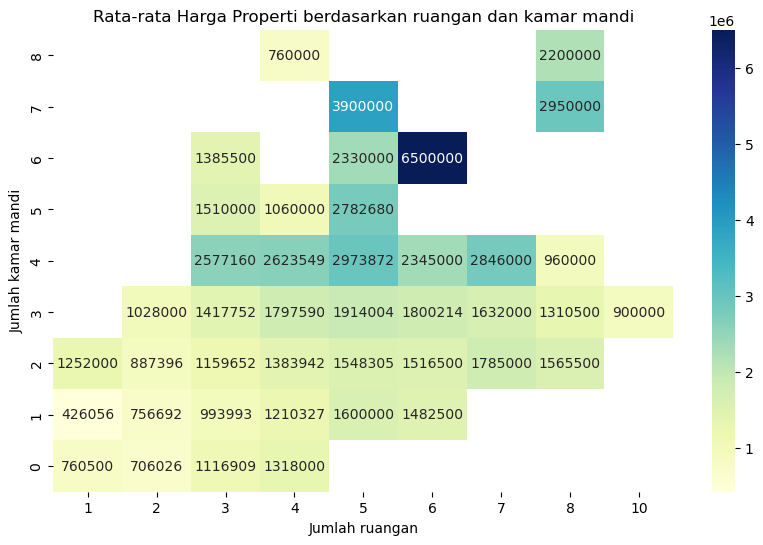

In [40]:
# Membuat pivot table, dengan kolom 'rooms' menjadi kolom dan 'bathroom' menjadi baris
pivot_table = df.pivot_table(values='price', index='bathroom', columns='rooms', aggfunc='mean')

# Membuat heatmap dari pivot table yang sudah dibalik
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')

# Memberikan judul dan label sumbu
plt.title('Rata-rata Harga Properti berdasarkan ruangan dan kamar mandi')
plt.xlabel('Jumlah ruangan')
plt.ylabel('Jumlah kamar mandi')

# Membalik sumbu y agar mulai dari 0 ke atas
plt.gca().invert_yaxis()

Berdasarkan visualisasi di atas, dapat dilihat bahwa ada korelasi antara harga properti terhadap jumlah ruangan dan kamar mandi. Harga rata-rata properti tertinggi dimiliki oleh 6 ruangan dan 6 kamar mandi. Secara general, semakin sedikit jumlah ruangan dan kamar mandi, maka akan semakin murah pula harga properti tersebut. Hal yang sama berlaku sebaliknya. Hal ini juga sejalan dengan uji-uji yang telah dilakukan sebelumnya seperti Uji Korelasi Kendall Test dan nilai median untuk masing-masing jumlah ruangan dan kamar mandi.

> **Sehingga dapat disimpulkan bahwa jumlah ruangan dan kamar mandi mempengaruhi harga properti**.

### 2. Apakah ketersediaan tempat parkir mempengaruhi harga properti?

#### Melakukan Uji Beda Mann Whitney U Test One Sided (Stat Inferential)

Reference: https://datatab.net/tutorial/mann-whitney-u-test

Pada case ini, kita akan mengecek apakah ketersediaan tempat parkir akan mempengaruhi harga properti. Oleh karena itu, kita akan melakukan Comparative Analysis untuk mengetahui apakah ada perbedaan harga antara properti yang memiliki tempat parkir dan properti yang tidak memiliki tempat parkir.

Berdasarkan Normality Test Jarque Bera yang telah dilakukan pada subbab 5.1.1, telah diketahui bahwa data harga properti tidak terdistribusi normal. Oleh karena itu, kita akan menggunakan Mann Whitney U Test karena termasuk ke dalam kategori non-parametrik. Sehingga bisa digunakan dalam kondisi data yang tidak terdistribusi normal.

Kita akan melakukan Mann Whitney One Sided Test dimana kita meyakini bahwa harga properti yang memiliki tempar parkir lebih mahal dibandingkan dengan harga properti yang tidak memiliki tempat parkir. Dengan Confidence Level 95%, kita dapat merumuskan H0 dan H1 sebagai berikut.

> H0: Harga properti dengan tempat parkir ***tidak lebih mahal*** daripada harga properti tanpa tempat parkir. <br>
> H1: harga properti dengan tempat parkit ***lebih mahal*** daripada harga properti tanpa tempat parkir.

In [41]:
# Uji Mann Whitney One Sided
stat, p_value = stats.mannwhitneyu(df[df['carspots']>0]['price'], df[df['carspots']==0]['price'], alternative='greater')

print(f'Nilai p-value: {p_value:.4f}')

Nilai p-value: 1.0000


Berdasarkan Mann Whitney One Sided Test di atas, nilai p-value > 0.05 yang berarti tidak terdapat cukup bukti untuk menolak H0. Artinya, harga properti dengan tempat parkir <u>tidak lebih mahal</u> daripada harga properti tanpa tempat parkir. Ini berarti bahwa harga properti dengan tempat parkir bisa saja sama atau bahkan lebih murah dibandingkan dengan harga properti tanpa tempat parkir.

#### Melakukan Uji Korelasi Kendall (Stat Inferential)

Reference: https://ademos.people.uic.edu/Chapter22.html#:~:text=2.3%20Kendall%20Correlation,-The%20Kendall%20correlation&text=It%20can%20be%20used%20with,of%20dependence%20between%20two%20variables

Setelah kita mengetahui bahwa harga properti dengan tempat parkir tidak lebih mahal dibandingkan dengan harga properti tanpa tempat parkir, kita bisa melakukan uji korelasi untuk mengecek bagaimana korelasi antara harga properti dengan ketersediaan tempat parkir. Uji Korelasi yang akan dilakukan menggunakan metode Kendall Correlation karena uji Korelasi Kendall dapat digunakan untuk variabel yang memiliki tipe data nominal (ketersediaan tempat parkir) dan tipe data continuous (price). Uji korelasi Kendall terutama akan sangat disukai apabila datanya tidak terdistribusi secara normal. 

Dengan Confidence Level 95%, kita akan merumuskan H0 dan H1 sebagai berikut.

> H0: Tidak ada korelasi antara harga properti dengan ketersediaan tempat parkir <br>
> H1: Ada korelasi antara harga properti dengan ketersediaan tempat parkir

In [42]:
# Slicing untuk carspots dan price
parking = df[['carspots', 'price']]

# Mengubah nilai carspots menjadi 0 (no) dan 1 (yes)
parking.loc[:, 'carspots'] = parking['carspots'].apply(lambda x: 0 if x == 0 else 1 )

corr_tau, p_value = stats.kendalltau(parking.carspots, parking.price)
print(f'Nilai p-value: {p_value:.4f} dengan korelasi sebesar {corr_tau:.4f}')

Nilai p-value: 0.0000 dengan korelasi sebesar -0.0311


Berdasarkan Uji Kendall di atas, nilai p-value < 0.05 yang berarti terdapat cukup bukti untuk menolak H0 dan H1 diterima. Artinya ada korelasi yang signifikan secara statistik antara harga properti dengan ketersediaan tempat parkir. Apabila dilihat dari nilai korelasi sebesar -0.0311, ternyata korelasi yang dimiliki sangat lemah antara ketersediaan tempat parkir dengan harga properti. Nilai negatif disini berarti bahwa hubungan antara ketersediaan tempat parkir dengan harga properti berbanding terbalik dan harga cenderung lebih mahal untuk properti yang tidak memiliki ketersediaan tempat parkir.

#### Mengecek Nilai Mean dan Median untuk Harga Properti Dengan dan Tanpa Tempat Parkir

In [43]:
# Melihat nilai mean dan median harga dengan dan tanpa tempat parkir
mean_with = df[df['carspots'] > 0]['price'].mean()
median_with = df[df['carspots'] > 0]['price'].median()
mean_without = df[df['carspots'] == 0]['price'].mean()
median_without = df[df['carspots'] == 0]['price'].median()

print(f'''
Mean harga properti dengan tempat parkir    : {mean_with:,.2f}
Median harga properti dengan tempat parkir  : {median_with:,.2f}
Mean harga properti tanpa tempat parkir     : {mean_without:,.2f}
Median harga properti tanpa tempat parkir   : {median_without:,.2f}
''')


Mean harga properti dengan tempat parkir    : 1,075,405.89
Median harga properti dengan tempat parkir  : 897,000.00
Mean harga properti tanpa tempat parkir     : 1,079,088.01
Median harga properti tanpa tempat parkir   : 1,001,000.00



Dari perbandingan nilai mean dan median untuk masing-masing harga properti dengan dan tanpa tempat parkir dapat disimpulkan bahwa harga properti yang tidak memiliki tempat parkir lebih mahal dibandingkan dengan harga properti yang memiliki tempat parkir. Hal ini mungkin disebabkan oleh properti-properti yang berada di pusat kota atau lokasi yang strategis lebih berfokus kepada mempermudah akses untuk transportasi umum dan tidak mengutamakan lahan parkir. Lahan parkir mungkin bukan menjadi prioritas utama mengingat harga tanah di pusat kota biasanya lebih mahal dibandingkan dengan daerah pinggir kota.

#### Visualisasi

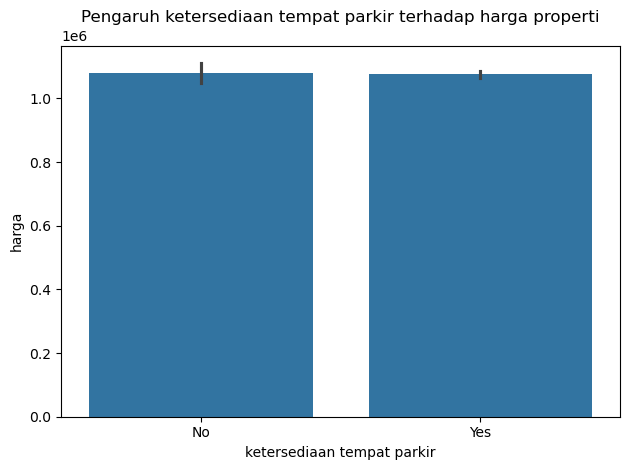

In [44]:
# Membuat visualisasi barplot
ax = sns.barplot(data=parking, x='carspots', y='price')

# Customize chart
ax.set(xlabel='ketersediaan tempat parkir', ylabel='harga')
ax.set_xticks([0, 1]) 
ax.set_xticklabels(['No', 'Yes'])
ax.set_title('Pengaruh ketersediaan tempat parkir terhadap harga properti')

plt.tight_layout();

Dari visualisasi di atas terlihat bahwa harga rata-rata properti untuk tempat parkir tidak terlalu beda jauh antara properti yang memiliki tempat parkir dengan properti yang tidak memiliki tempat parkir bahkan relatif sama.

Hasil dari visualisasi di atas sesuai dengan Uji Statistika yang telah kita lakukan sebelumnya. Dari Mann Whitney One Sided kita mengetahui bahwa harga properti dengan tempat parkir tidak lebih mahal dibandingkan harga properti dengan tempat parkir. Dari Kendall Test kita juga mengetahui bahwa ada korelasi yang signifikan secara statistik antara ketersediaan tempat parkir dengan harga properti namun nilai korelasi nya sangat kecil yaitu -0.03. 

> **Sehingga dapat disimpulkan bahwa ketersediaan tempat parkir tidak mempengaruhi harga properti.**

### 3. Bagaimana pengaruh luas tanah dan harga properti di beberapa region dan region mana yang memiliki harga tanah per m2 yang paling mahal?

#### Melakukan Uji Korelasi Spearman (Stat Inferential)

Reference: https://www.statstest.com/spearmans-rho/#:~:text=Spearman's%20Rho%20is%20often%20used,that%20have%20an%20inherent%20order

Dari Normality Test telah diketahui bahwa data yang dimiliki tidak terdistribusi secara normal. Oleh karena itu, untuk mengecek korelasi antara luas tanah dan harga properti di beberapa region akan menggunakan Spearman Correlation karena data tidak terdistribusi secara normal dan spearman dapat digunakan ketika variable memiliki tipe data ordinal dan continuous. Dalam case ini kedua variabel yang akan dibandingkan bertipe data continuous. Dengan Confidence Level 95%, kita dapat merumuskan H0 dan H1 sebagai berikut.

> H0: Tidak ada korelasi yang signifikan antara luas tanah dan harga properti <br>
> H1: Ada korelasi yang signifikan antara luas tanah dan harga properti

In [45]:
# Mencari nilai data unique semua region
regions = df.region_name.unique()

# Looping untuk mencari nilai korelasi spearman untuk setiap region
for region in regions:
    data_region = df[df['region_name'] == region]
    corr, p_value = stats.spearmanr(data_region['landsize'], data_region['price'])

    if p_value < 0.05:
        print(f'Region {region} memiliki korelasi signifikan secara statistik karena nilai p-value sebesar {p_value:.4f} dengan korelasi sebesar {corr:.4f}')
    else:
        print(f'Region {region} tidak memiliki korelasi signifikan secara statistik karena nilai p-value sebesar {p_value:.4f}')

Region Northern Metropolitan memiliki korelasi signifikan secara statistik karena nilai p-value sebesar 0.0000 dengan korelasi sebesar 0.1398
Region Western Metropolitan memiliki korelasi signifikan secara statistik karena nilai p-value sebesar 0.0000 dengan korelasi sebesar 0.2808
Region Southern Metropolitan memiliki korelasi signifikan secara statistik karena nilai p-value sebesar 0.0000 dengan korelasi sebesar 0.5055
Region Eastern Metropolitan memiliki korelasi signifikan secara statistik karena nilai p-value sebesar 0.0000 dengan korelasi sebesar 0.5227
Region South-Eastern Metropolitan memiliki korelasi signifikan secara statistik karena nilai p-value sebesar 0.0000 dengan korelasi sebesar 0.3189
Region Eastern Victoria memiliki korelasi signifikan secara statistik karena nilai p-value sebesar 0.0006 dengan korelasi sebesar 0.4543
Region Northern Victoria memiliki korelasi signifikan secara statistik karena nilai p-value sebesar 0.0000 dengan korelasi sebesar 0.6475
Region Weste

Dari 8 region, semua region memiliki korelasi signifikan secara statistik karena memiliki nilai p-value < 0.05 yang berarti terdapat cukup bukti untuk menolak H0 dan H1 diterima. Hal ini berarti ada korelasi signifikan antara luas tanah dan harga properti dan memiliki korelasi moderat dengan nilai korelasi berkisar di antara 0.1398 - 0.6475. Nilai korelasi tertinggi diperoleh oleh Northern Victoria sedangkan nilai korelasi terendah dimiliki oleh Northern Metropolitan. Semua region memiliki nilai korelasi positif yang berarti bahwa semakin besar luas tanah, maka akan semakin mahal harga properti tersebut.

#### Mengecek Nilai Median Harga Tanah Per m2 untuk Masing-Masing Region (Stat Deskriptif)

In [46]:
# Mencari nilai median dan harga per m2
land = df[['landsize', 'price', 'region_name']]
land.insert(2, 'price per m2', land.price/land.landsize)
land.groupby('region_name').median().sort_values(by='price per m2', ascending=False)

,landsize,price,price per m2
region_name,,,
Southern Metropolitan,361.0,1250000.0,4112.903226
Northern Metropolitan,326.0,806250.0,2829.914861
Western Metropolitan,452.0,793000.0,2251.913352
Eastern Metropolitan,649.0,1010000.0,1838.709677
South-Eastern Metropolitan,604.0,850000.0,1493.021903
Eastern Victoria,796.0,670000.0,879.629630
Northern Victoria,724.0,540000.0,718.424102
Western Victoria,599.5,400000.0,629.727997


Dari analisis median harga dan luas tanah untuk masing-masing region, dapat diambil kesimpulan bahwa harga tanah per m2 paling tinggi adalah properti yang berada di region Metropolitan terutama Southern Metropolitan. Hal ini menunjukkan bahwa tingginya permintaan properti di region tersebut karena merupakan pusat kota dan ekonominya berkembang pesat.

Sedangkan harga tanah per m2 paling rendah adalah properti yang berada di region Victoria terutama Western Victoria. Hal ini menunjukkan bahwa permintaan properti di region tersebut tidak setinggi permintaan di region lain yang bisa saja disebabkan oleh jarak ke pusat kota yang cukup jauh.

#### Visualisasi

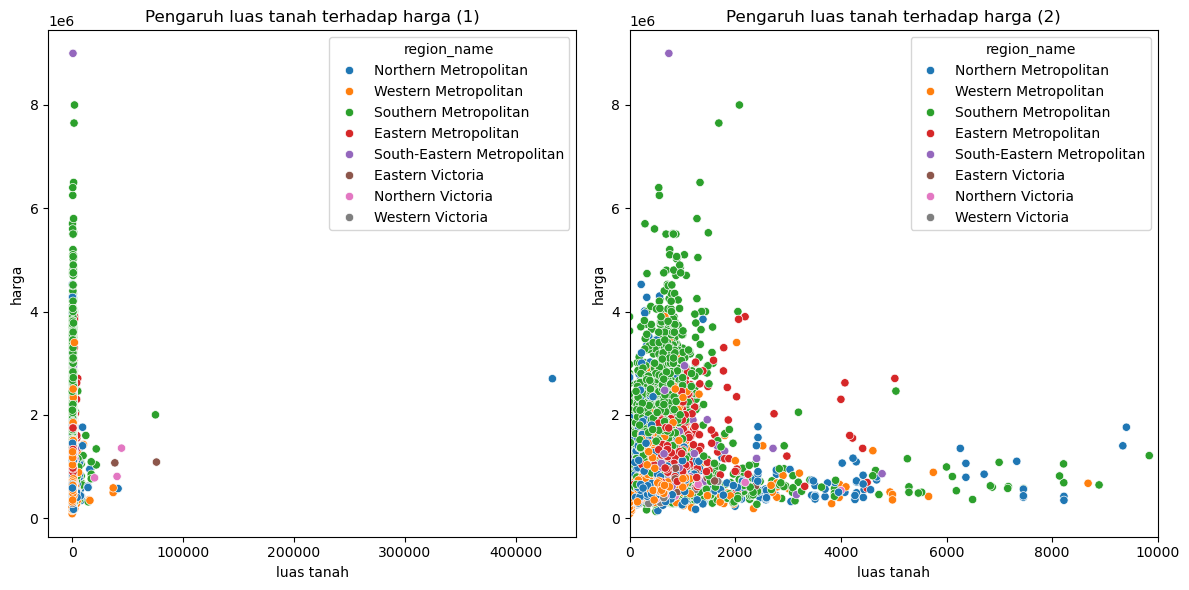

In [47]:
# Membuat visualisasi scatterplot
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
sns.scatterplot(data=df, x='landsize', y='price', hue='region_name', ax=ax[0])
sns.scatterplot(data=df, x='landsize', y='price', hue='region_name', ax=ax[1]).set_xlim(0, 10000)

# Customisasi chart
ax[0].set(xlabel='luas tanah', ylabel='harga')
ax[1].set(xlabel='luas tanah', ylabel='harga')
ax[0].set_title('Pengaruh luas tanah terhadap harga (1)')
ax[1].set_title('Pengaruh luas tanah terhadap harga (2)')

plt.tight_layout();

Grafik di sebelah kiri merupakan hasil visualisasi pengaruh luas tanah terhadap harga. Namun dapat dilihat bahwa terdapat outlier pada luas tanah sehingga akan sulit untuk mengamati grafik tersebut. Oleh karena itu, saya akan membatasi axis sumbu x dari 0 - 10000. 

Dari grafik tersebut bisa dilihat bahwa terdapat hubungan antara luas tanah terhadap harga di semua region. Semakin tinggi luas tanah, maka akan semakin tinggi pula harga properti tersebut. Hal ini wajar karena tanah merupakan salah satu komponen utama yang menentukan nilai properti. Terutama karena keterbatasan luas lahan akan membuat harga tanah pada daerah tersebut tinggi sesuai dengan konsep dasar ekonomi penawaran dan permintaaan. Ini juga lah yang menyebabkan harga tanah pada beberapa region lebih mahal dibandingkan dengan harga tanah pada region lainnya. Hal ini sejalan dengan uji statistika yang telah dilakukan sebelumnya.

> **Sehingga dapat disimpulkan bahwa luas tanah berpengaruh terhadap harga properti.**

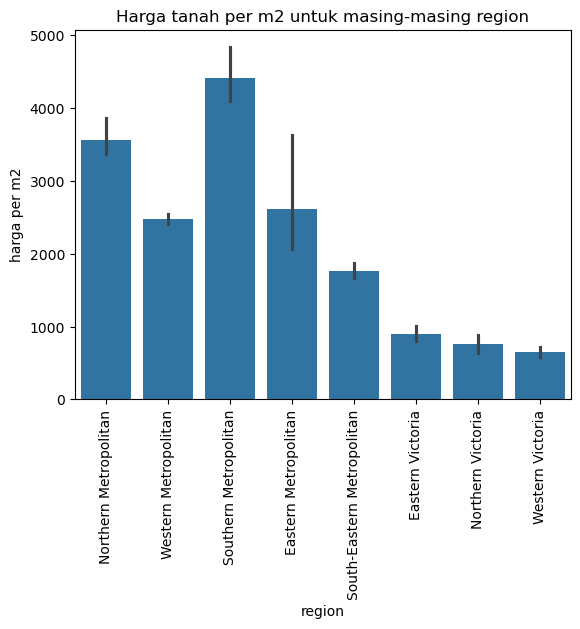

In [48]:
# Membuat visualisasi barplot
ax = sns.barplot(data=land, x='region_name', y='price per m2')

# Customize chart
plt.xticks(rotation=90)
ax.set(xlabel='region', ylabel='harga per m2')
ax.set_title('Harga tanah per m2 untuk masing-masing region');   

Grafik di atas menunjukkan harga tanah per region. Dapat dilihat bahwa untuk region yang memiliki harga tanah paling mahal adalah Southern Region dan Western Victoria yang memiliki harga tanah yang paling murah. Hal ini sejalan dengan kesimpulan yang telah diambil sebelumnya dimana harga tanah pada beberapa region lebih mahal dibandingkan dengan region lain bisa saja disebabkan karena tingginya permintaan di region tersebut dan keterbatasan luas lahan.

### 4. Bagaimana pengaruh luas bangunan dan harga properti di beberapa region?

#### Melakukan Uji Korelasi Spearman (Stat Inferential)

Reference: https://www.statstest.com/spearmans-rho/#:~:text=Spearman's%20Rho%20is%20often%20used,that%20have%20an%20inherent%20order

Dari Normality Test telah diketahui bahwa data yang dimiliki tidak terdistribusi secara normal. Oleh karena itu, untuk mengecek korelasi antara luas bagunan dan harga properti di beberapa region akan menggunakan Spearman Correlation karena data tidak terdistribusi secara normal dan spearman dapat digunakan ketika variable memiliki tipe data ordinal dan continuous. Dalam case ini kedua variabel yang akan dibandingkan bertipe data continuous. Dengan Confidence Level 95%, kita dapat merumuskan H0 dan H1 sebagai berikut.

> H0: Tidak ada korelasi yang signifikan antara luas bangunan dan harga properti <br>
> H1: Ada korelasi yang signifikan antara luas bangunan dan harga properti

In [49]:
# Looping untuk mencari nilai korelasi spearman untuk masing-masing region
for region in regions:
    data_region = df[df['region_name'] == region]
    corr, p_value = stats.spearmanr(data_region['building_area'], data_region['price'])

    if p_value < 0.05:
        print(f'Region {region} memiliki korelasi signifikan secara statistik karena nilai p-value sebesar {p_value:.4f} dengan korelasi sebesar {corr:.4f}')
    else:
        print(f'Region {region} tidak memiliki korelasi signifikan secara statistik karena nilai p-value sebesar {p_value:.4f}')

Region Northern Metropolitan memiliki korelasi signifikan secara statistik karena nilai p-value sebesar 0.0000 dengan korelasi sebesar 0.3353
Region Western Metropolitan memiliki korelasi signifikan secara statistik karena nilai p-value sebesar 0.0000 dengan korelasi sebesar 0.3755
Region Southern Metropolitan memiliki korelasi signifikan secara statistik karena nilai p-value sebesar 0.0000 dengan korelasi sebesar 0.5623
Region Eastern Metropolitan memiliki korelasi signifikan secara statistik karena nilai p-value sebesar 0.0000 dengan korelasi sebesar 0.3769
Region South-Eastern Metropolitan memiliki korelasi signifikan secara statistik karena nilai p-value sebesar 0.0000 dengan korelasi sebesar 0.2914
Region Eastern Victoria memiliki korelasi signifikan secara statistik karena nilai p-value sebesar 0.0049 dengan korelasi sebesar 0.3806
Region Northern Victoria memiliki korelasi signifikan secara statistik karena nilai p-value sebesar 0.0110 dengan korelasi sebesar 0.3929
Region Weste

Dari 8 region, hanya Nostern Victoria yang tidak memiliki korelasi signifikan secara statistik karena memiliki nilai p-value > 0.05. Hal ini berarti bahwa untuk di region tersebut, luas bangunan tidak memiliki hubungan yang signifikan terhadap harga propoerti. 

Sedangkan untuk sisa region yang lain memiliki nilai p-value < 0.05 yang berarti terdapat cukup bukti untuk menolak H0 dan H1 diterima. Ini berarti terdapat korelasi yang signifikan antara luas bangunan dan harga properti. Korelasi antara luas bangunan dengan harga properti adalah moderat dimana nilai korelasi berkisar di antara 0.29 - 0.56. Nilai korelasi tertinggi diperoleh oleh Southern Metropolitan sedangkan nilai korelasi terendah dimiliki oleh South-Eastern Metropolitan.

#### Mengecek Nilai Median (Stat Deskriptif)

In [50]:
# Mencari nilai median berdasarkan building area di masing-masing region
df.groupby('region_name')[['building_area', 'price']].median().sort_values(by='price', ascending=False)

,building_area,price
region_name,,
Southern Metropolitan,126.0,1250000.0
Eastern Metropolitan,126.0,1010000.0
South-Eastern Metropolitan,126.0,850000.0
Northern Metropolitan,126.0,806250.0
Western Metropolitan,126.0,793000.0
Eastern Victoria,126.0,670000.0
Northern Victoria,131.0,540000.0
Western Victoria,126.0,400000.0


Hampir semua region memiliki building area di 126.0 m2. Namun dengan ukuran luas tanah yang cenderung sama, terdapat perbedaan harga yang signifikan di antar region. Region yang memiliki harga yang paling mahal adalah daerah Metropolitan terutama Southern Metropolitan. Ini mengindikasikan bahwa kawasan ini memiliki daya tarik yang tinggi dan memiliki lokasi yang strategis. Sedangkan untuk harga properti terendah adalah Western Victoria. 

Ini mengindikasikan bahwa faktor region memiliki peran yang lebih besar dibandingkan dengan luas bangunan dalam menentukan harga sebuah properti. 

#### Visualisasi

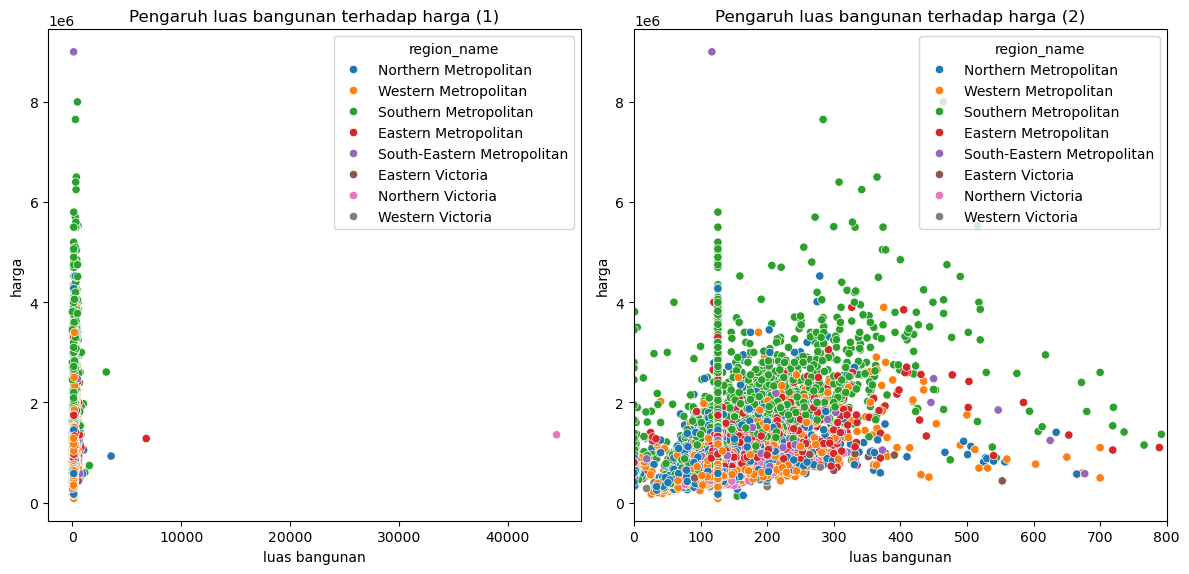

In [51]:
# Visualisasi chart
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
sns.scatterplot(data=df, x='building_area', y='price', hue='region_name', ax=ax[0])
sns.scatterplot(data=df, x='building_area', y='price', hue='region_name', ax=ax[1]).set_xlim(0, 800)

# Customize chart
ax[0].set(xlabel='luas bangunan', ylabel='harga')
ax[1].set(xlabel='luas bangunan', ylabel='harga')
ax[0].set_title('Pengaruh luas bangunan terhadap harga (1)')
ax[1].set_title('Pengaruh luas bangunan terhadap harga (2)')
plt.tight_layout();

Grafik di sebelah kiri merupakan hasil visualisasi pengaruh luas bangunan terhadap harga. Namun dapat dilihat bahwa terdapat outlier pada luas bangunan sehingga akan sulit untuk mengamati grafik tersebut. Oleh karena itu, saya akan membatasi axis sumbu x dari 0 - 800. 

Dari grafik tersebut bisa dilihat bahwa terdapat hubungan antara luas bangunan terhadap harga di semua region. Semakin tinggi luas bangunan, maka akan semakin tinggi pula harga properti tersebut. Hal ini sejalan dengan uji statistika yang telah dilakukan sebelumnya.

> **Sehingga dapat disimpulkan bahwa luas bangunan berpengaruh terhadap harga properti.**

### 5. Apakah semakin baru suatu properti maka harganya akan semakin mahal?

#### Melakukan Uji Korelasi Kendall (Stat Inferential)

Reference: https://ademos.people.uic.edu/Chapter22.html#:~:text=2.3%20Kendall%20Correlation,-The%20Kendall%20correlation&text=It%20can%20be%20used%20with,of%20dependence%20between%20two%20variables

Dari Normality Test telah diketahui bahwa data yang dimiliki tidak terdistribusi secara normal. Uji Korelasi yang akan dilakukan menggunakan metode Kendall Correlation karena uji Korelasi Kendall dapat digunakan untuk variabel yang memiliki tipe data discrete (year) dan tipe data continuous (price). Uji korelasi Kendall terutama akan sangat disukai apabila datanya tidak terdistribusi secara normal. Dengan Confidence Level 95%, kita dapat merumuskan H0 dan H1 sebagai berikut.

> H0: Tidak ada korelasi antara tahun properti dibangun terhadap harga properti.<br>
> H1: Terdapat korelasi antara tahun properti dibangun terhadap harga properti.

In [52]:
# Menghitung nilai korelasi kendall
corr, p_value = stats.kendalltau(df.year_built, df.price)

print(f'Nilai p-value sebesar {p_value:.4f} dengan nilai korelasi sebesar {corr:.4f}')

Nilai p-value sebesar 0.0000 dengan nilai korelasi sebesar -0.2524


Berdasarkan Uji Korelasi Kendall yang telah dilakukan, nilai p-value < 0.05 yang berarti terdapat cukup bukti untuk menolak H0 sehingga H1 diterima. Hal ini menandakan bahwa terdapat hubungan yang signifikan secara statistik antara tahun properti tersebut dibangun terhadap harganya. Nilai korelasi sebesar -0.2524 menunjukkan bahwa ada hubungan korelasi yang moderat dan nilai negatif mengindikasikan bahwa hubungannya berbanding terbalik.

Semakin tua sebuah bangunan, maka semakin mahal harganya dan berlaku sebaliknya. Ini mungkin disebabkan karena properti-properti yang sudah dibangun dari dulu berada di lokasi yang lebih strategis dibandingkan dengan properti yang lebih baru. Properti yang lebih baru bisa saja dibangun di lokasi yang belum terlalu banyak peminatnya.

#### Mengecek Nilai Median (Statistik Deskriptif)

In [53]:
# Mencari nilai median harga berdasarkan tahun dibangung
df.groupby('year_built')[['price']].median().sort_values('price', ascending=False)

,price
year_built,
1884,5046000.0
1903,3455000.0
1893,3335000.0
1854,3310000.0
1862,3200000.0
...,...
1970,618250.0
1974,613000.0
1972,603500.0


Dari pengecekan nilai median di atas, terlihat harga properti cenderung mahal untuk properti yang sudah lama dibangun dibandingkan dengan properti yang baru dibangun. Seperti yang telah dijelaskan sebelumnya, hal ini mungkin terjadi karena properti yang berusia tua telah lebih dulu dibangun di lokasi yang strategis. Sehingga harganya akan cenderung lebih mahal dibandingkan dengan properti yang baru dibangun di daerah yang masih dalam tahap pengembangan. Hal ini sejalan dengan uji korelasi Kendall yang telah dilakukan sebelumnya. 

#### Visualisasi

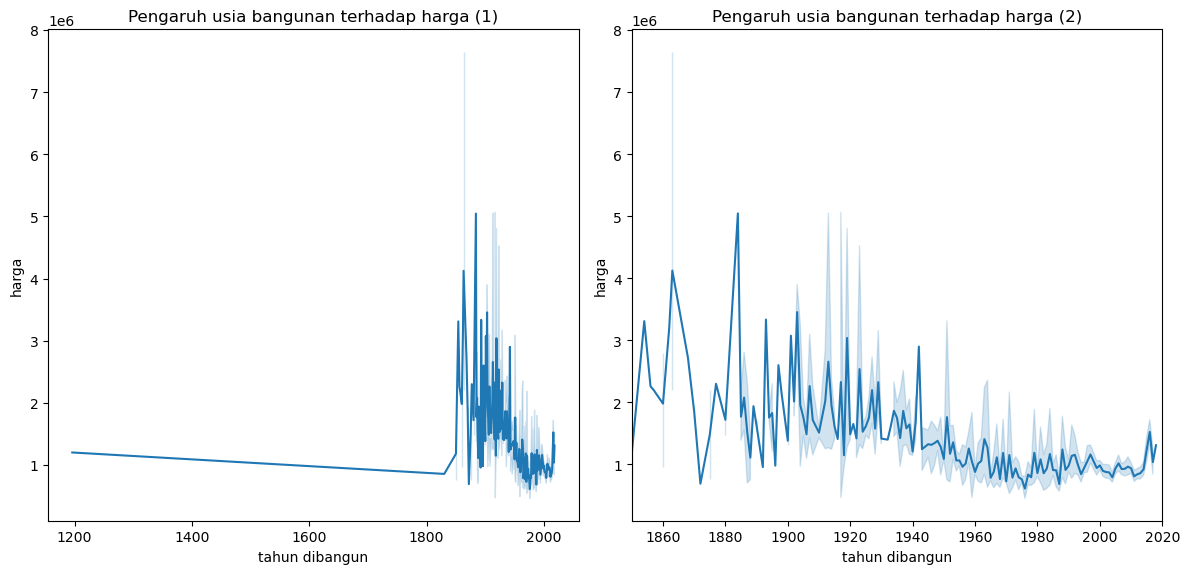

In [54]:
# Visualisasi chart
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
sns.lineplot(x=df.year_built, y=df.price, ax=ax[0])
sns.lineplot(x=df.year_built, y=df.price, ax=ax[1]).set_xlim(1850, 2020)

# Customize chart
ax[0].set(xlabel='tahun dibangun', ylabel='harga')
ax[1].set(xlabel='tahun dibangun', ylabel='harga')
ax[0].set_title('Pengaruh usia bangunan terhadap harga (1)')
ax[1].set_title('Pengaruh usia bangunan terhadap harga (2)')
plt.tight_layout();

Grafik di sebelah kiri merupakan hasil visualisasi pengaruh tahun dibangun terhadap harga. Namun dapat dilihat bahwa terdapat outlier pada tahun dibangun dan akan sulit untuk mengamati grafik tersebut. Oleh karena itu, saya akan membatasi axis sumbu x dari 1850 - 2020. 

Dari grafik tersebut bisa dilihat bahwa terdapat hubungan negatif antara tahun dibangun terhadap harga properti. Semakin lama usia bangunan, maka akan semakin tinggi pula harga properti tersebut. Hal ini sejalan dengan uji statistika yang telah dilakukan sebelumnya.

> **Sehingga dapat disimpulkan bahwa tahun dibangun berpengaruh terhadap harga properti.**

## 5.2. Menentukan Pengaruh Faktor Geografis Terhadap Harga Properti

### 6. Bagaimana distribusi harga properti di setiap region?

#### Melakukan Uji Beda Kruskal Wallis (Stat Inferential)

Reference: https://datatab.net/tutorial/kruskal-wallis-test

Dari Normality Test telah diketahui bahwa data yang dimiliki tidak terdistribusi secara normal. Oleh karena itu, untuk mengecek apakah ada perbedaan yang signifikan secara statistik antara region dengan harga properti kita akan menggunakan Uji Beda Kruskal Wallis. Metode ini dipilih karena data tidak terdistribusi secara normal dan membandingkan antara numerical dan categorical dimana terdapat lebih dari 2 categorical. Dengan Confidence Level 95%, kita dapat merumuskan H0 dan H1 sebagai berikut.

> H0: Tidak ada perbedaan signifikan antara median harga properti di beberapa region.<br>
> H1: Ada perbedaan signifikan antara median harga properti di beberapa region.

In [55]:
price_region = [ df[df['region_name']==region]['price'].dropna() for region in regions ]

stat, p_value = stats.kruskal(*price_region)
print(f'Nilai p-value: {p_value:.4f}')

Nilai p-value: 0.0000


Berdasarkan Uji Kruskal Wallis di atas, nilai p-value < 0.05 dan dapat disimpulkan bahwa terdapat cukup bukti untuk menolak H0 dan H1 diterima. Ini mengindikasikan bahwa ada perbedaan signifikan antara median harga properti di beberapa region. Hal ini berarti harga properti di tiap region berbeda. 

Untuk mengatahui seberapa besar perbedaan nilainya berapa nilainya, kita bisa menggunakan statistic descriptif seperti data mean dan median. Namun karena data ini tidak terdistribusi secara normal, kita akan menggunakan median sebagai tolak ukur karena lebih robust terhadap adanya outlier. Dengan nilai median, dapat di cek region mana yang memiliki harga tertinggi atau terendah.

#### Mengecek Nilai Median (Stat Deskriptif)

In [56]:
df.groupby('region_name')[['price']].median().sort_values('price', ascending=False)

,price
region_name,
Southern Metropolitan,1250000.0
Eastern Metropolitan,1010000.0
South-Eastern Metropolitan,850000.0
Northern Metropolitan,806250.0
Western Metropolitan,793000.0
Eastern Victoria,670000.0
Northern Victoria,540000.0
Western Victoria,400000.0


Dari nilai median di atas, terlihat bahwa region yang memiliki harga properti tertinggi adalah Region Metropolitan terutama Southern Metropolitan dan harga properti terendah adalah Region Victoria terutama Western Victoria. Hal ini bisa terjadi karena lokasi-lokasi yang strategis akan lebih banyak peminatnya dan menyebabkan harga properti tersebut naik. Hal ini sesuai dengan uji statistik yang telah dilakukan sebelumnya bahwa terdapat perbedaan yang signifikan antara harga properti dengan region.



#### Visualisasi

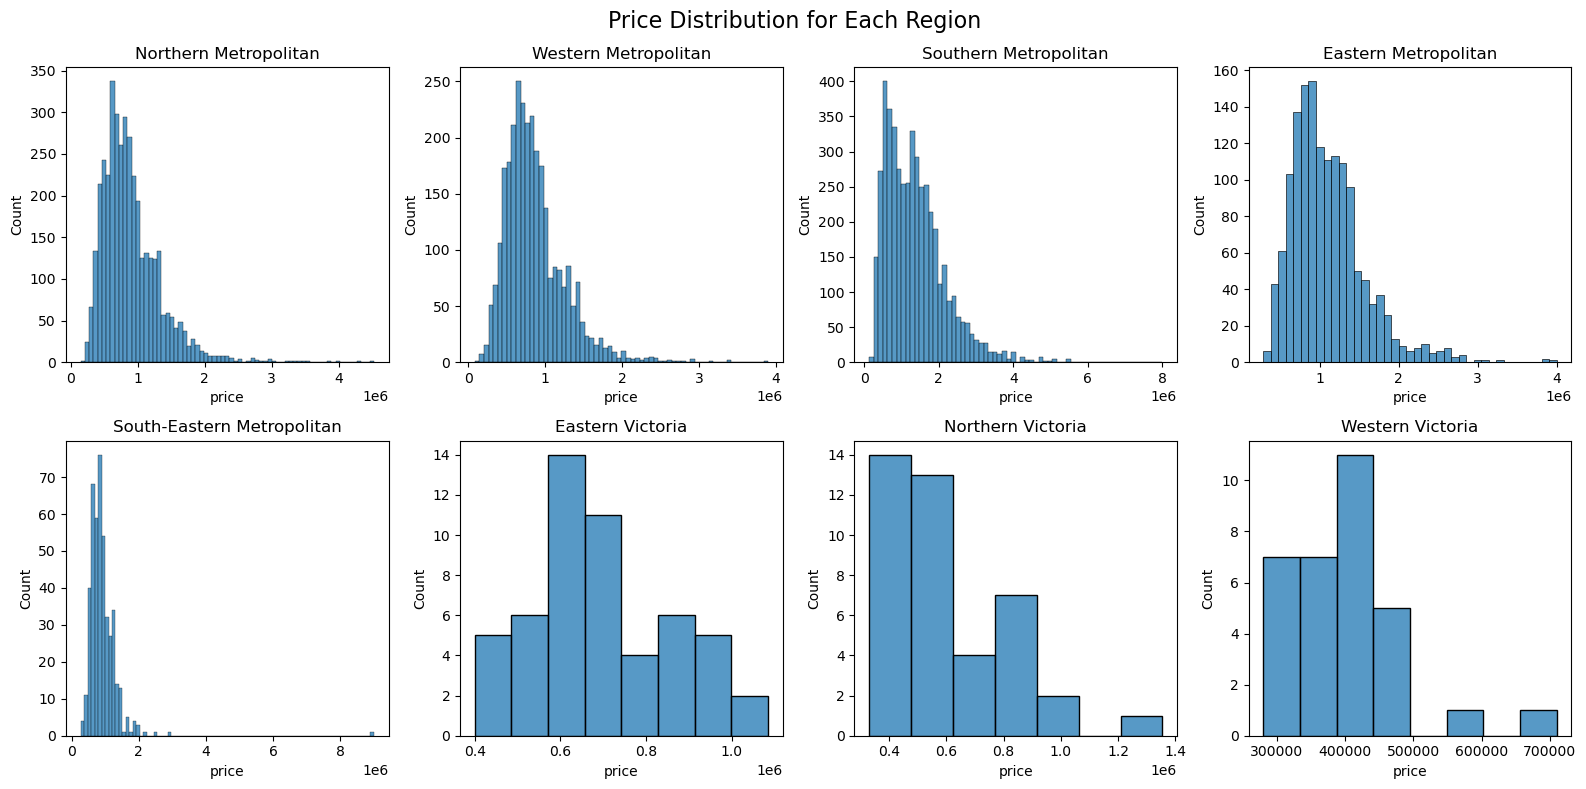

In [57]:
# Membuat visualisai
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(16, 8))

# Loop untuk setiap region
for ax, region in zip(axes.flatten(), regions):
    sns.histplot(df[df['region_name'] == region]['price'], ax=ax)
    ax.set_title(region)

fig.suptitle('Price Distribution for Each Region', fontsize=16)
plt.tight_layout();

Chart di atas merupakan visualisasi histogram untuk masing-masing region. Dari visualisasi di atas dapat terlihat bahwa data cenderung positif skew. Ini berarti nilai outlier paling ekstrem berada di sebelah kanan kurva atau memiliki harga yang mahal.  Jika dilihat dari jumlah penjualannya, region Metropolitan memiliki penjualan yang jauh lebih tinggi dibandingkan dengan region Victoria. 

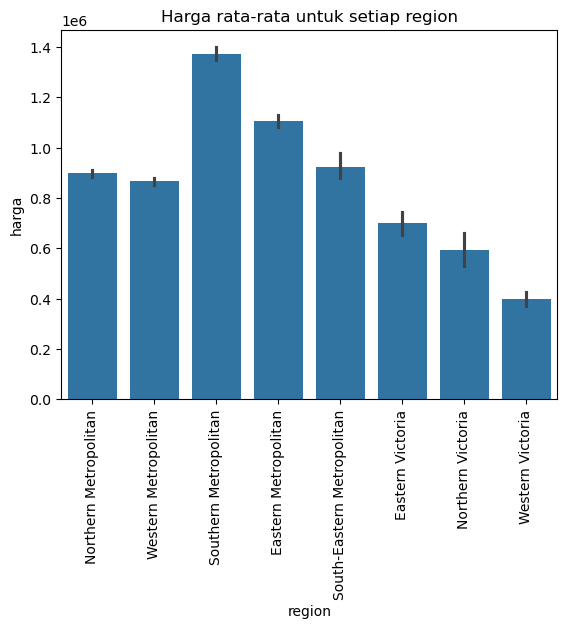

In [58]:
# Visualisai chart
ax = sns.barplot(data=df, x='region_name', y='price')

# Customize chart
ax.set(xlabel='region', ylabel='harga')
ax.set_title('Harga rata-rata untuk setiap region')
plt.xticks(rotation=90);    

Dari chart di atas dapat dilihat bahwa region yang memiliki harga rata-rata paling tinggi adalah Southern Region yang menunjukkan bahwa tingginya permintaan properti untuk region tersebut. Hal ini bisa disebabkan karena lokasinya yang strategis, dekat dengan pusat kota, infrastruktur yang maju dan lain sebagainya. Sedangkan lokasi yang memiliki harga rata-rata paling rendah adalah Western Victoria. Ini mungkin disebabkan karena region ini masih dalam tahap pengembangan.

Perbedaan yang signifikan ini mengindikasikan bahwa lokasi region sangat mempengaruhi harga properti dan hal ini sejalan dengan uji beda yang telah dilakukan sebelumnya bahwa terdapat perbedaan harga properti antar region.

> **Sehingga dapat disimpulkan bahwa region memiliki pengaruh terhadap harga properti**

### 7. Apakah semakin dekat jarak properti ke Central Business District maka harganya akan semakin mahal?

#### Melakukan Uji Korelasi Spearman (Stat Inferential)

Reference: https://www.statstest.com/spearmans-rho/#:~:text=Spearman's%20Rho%20is%20often%20used,that%20have%20an%20inherent%20order

Dari Normality Test telah diketahui bahwa data yang dimiliki tidak terdistribusi secara normal. Oleh karena itu, untuk mengecek korelasi antara jarak properti ke Central Business District (CBD) dan harga properti kita akan menggunakan Spearman Correlation karena data tidak terdistribusi secara normal dan spearman dapat digunakan ketika variable memiliki tipe data ordinal dan continuous. Dalam case ini kedua variabel yang akan dibandingkan bertipe data continuous.Dengan Confidence Level 95%, kita dapat merumuskan H0 dan H1 sebagai berikut.

> H0: Tidak ada korelasi yang signifikan antara jarak properti ke CBD terhadap harga properti <br>
> H1: Ada korelasi yang signifikan antara jarak properti ke CBD terhadap harga properti

In [59]:
# Mencari nilai korelasi spearman
corr, p_value = stats.spearmanr(df.distance, df.price)

print(f'Nilai p-value sebesar {p_value:.4f} dengan nilai korelasi {corr:.4f}')

Nilai p-value sebesar 0.0000 dengan nilai korelasi -0.1300


Berdasarkan Uji Korelasi di atas, nilai p-value < 0.05 yang berarti terdapat cukup bukti untuk menolak H0 dan H1 diterima. Artinya ada korelasi yang signifikan secara statistik antara jarak properti ke Central Business District (CBD) terhadap harga properti. Apabila dilihat dari nilai korelasi sebesar -0.13, ternyata korelasi yang dimiliki cukup lemah antara jarak properti dengan harga properti. Nilai negatif disini berarti bahwa hubungan antara jarak properti dengan harga properti berbanding terbalik. 

Ini mengindikasikan bahwa semakin jauh jarak properti ke CBD, maka harganya akan semakin murah. Hal ini disebabkan karena semakin dekat lokasi properti ke CBD, maka akan semakin banyak peminatnya karena menawarkan luxury seperti jarak tempuh yang lebih dekat ke area pusat kota, fasilitas yang lebih lengkap, dll.

#### Mengecek Nilai Central Tendencies (Stat Deskriptif)

In [60]:
# Melihat nilai central tendencies
df[['distance', 'price']].describe()

,distance,price
count,13580.000000,1.358000e+04
mean,10.137776,1.075684e+06
std,5.868725,6.393107e+05
min,0.000000,8.500000e+04
25%,6.100000,6.500000e+05
50%,9.200000,9.030000e+05
75%,13.000000,1.330000e+06
max,48.100000,9.000000e+06


Secara keseluruhan, dari pengecekan central tendencies di atas menunjukkan bahwa terdapat variasi yang signifikan dalam harga properti berdasarkan jarak ke CBD. Jarak yang lebih dekat ke pusat kota cenderung memiliki harga yang lebih tinggi. Sedangkan properti yang lebih jauh memiliki harga yang lebih rendah.

#### Visualisasi

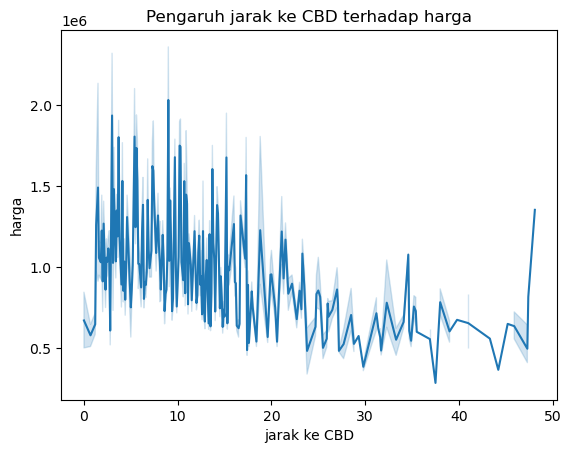

In [61]:
# visualisasi chart
ax = sns.lineplot(data=df, x='distance', y='price')

# Customize chart
ax.set(xlabel='jarak ke CBD', ylabel='harga')
ax.set_title('Pengaruh jarak ke CBD terhadap harga');

Dari chart di atas dapat dilihat bahwa semakin dekat suatu properti ke Central Business District (CBD) maka akan semakin mahal juga harga properti tersebut. Hal ini disebabkan karena semakin dekat lokasi properti ke CBD, maka akan semakin banyak peminatnya karena  jarak tempuh yang lebih dekat ke area pusat kota, fasilitas yang lebih lengkap, dll. 

Hal ini sejalan dengan Uji Korelasi yang telah dilakukan sebelumnya bahwa jarak ke CBD berpengaruh negatif terhadap harga properti tersebut. 

> **Sehingga dapat disimpulkan bahwa jarak ke CBD memiliki pengaruh terhadap harga properti.**

## 5.3. Menentukan Pengaruh Faktor Ekonomi Terhadap Harga Properti

### 8. Apakah ada perbedaan harga yang signifikan antar tipe properti?

#### Melakukan Uji Beda Kruskal Wallis (Stat Inferential)

Reference: https://datatab.net/tutorial/kruskal-wallis-test

Dari Normality Test telah diketahui bahwa data yang dimiliki tidak terdistribusi secara normal. Oleh karena itu, untuk mengecek apakah ada perbedaan yang signifikan secara statistik antara tipe properti dengan harga properti kita akan menggunakan Uji Beda Kruskal Wallis. Metode ini dipilih karena data tidak terdistribusi secara normal dan membandingkan antara numerical dan categorical dimana terdapat lebih dari 2 categorical. Dengan Confidence Level 95%, kita dapat merumuskan H0 dan H1 sebagai berikut.


> H0: Tidak ada perbedaan signifikan antara median harga properti di beberapa tipe properti.<br>
> H1: Ada perbedaan signifikan antara median harga properti di beberapa tipe properti.

In [62]:
# Membuat unique type
types = df.type.unique()

# List comprehension untuk membuat list harga dari masing-masing tipe
price_type = [ df[df['type']==type]['price'] for type in types ]

# Uji beda kruskal wallis
stat, p_value = stats.kruskal(*price_type)

print(f'Nilai p-value sebesar {p_value:.4f}')

Nilai p-value sebesar 0.0000


Berdasarkan Uji Beda Kruskal Wallis di atas, nilai p-value < 0.05 yang berarti terdapat cukup bukti untuk menolak H0 dan H1 diterima. Sehingga, ada perbedaan signifikan antara median harga properti di beberapa tipe properti. Hal ini berarti harga properti tidak sama untuk setiap tipe properti. Untuk mengecek lebih lanjut, kita akan menggunakan statistik deskriptif untuk menentukan perbedaan harganya. 

#### Mengecek Nilai Central Tendencies (Stat Deskriptif)

In [63]:
# Mengecek nilai central tendencies
df.groupby('type')[['price']].describe().T

type                house     townhouse  unit, duplex
price count  9.449000e+03  1.114000e+03  3.017000e+03
      mean   1.242665e+06  9.337351e+05  6.051275e+05
      std    6.680787e+05  3.950382e+05  2.609875e+05
      min    1.310000e+05  3.000000e+05  8.500000e+04
      25%    7.920000e+05  6.700000e+05  4.400000e+05
      50%    1.080000e+06  8.467500e+05  5.600000e+05
      75%    1.500000e+06  1.101900e+06  7.060000e+05
      max    9.000000e+06  3.475000e+06  3.625000e+06

Dapat dilihat bahwa untuk nilai mean dan median rumah lebih tinggi dari townhouse lebih tinggi dari unit/duplex (rumah > townhouse > unit/duplex). Ini menunjukkan bahwa peminat tipe properti rumah lebih banyak dibandingkan dengan tipe properti yang lain seperti townhouse dan unit/duplex. Perbedaan ini juga mungkin disebabkan oleh perbedaan fasilitas yang diberikan, lokasi properti, dll. Hal ini sesuai dengan uji statistika di atas bahwa ada perbedaan yang signifikan antara tipe properti dan harga properti.

#### Visualisasi

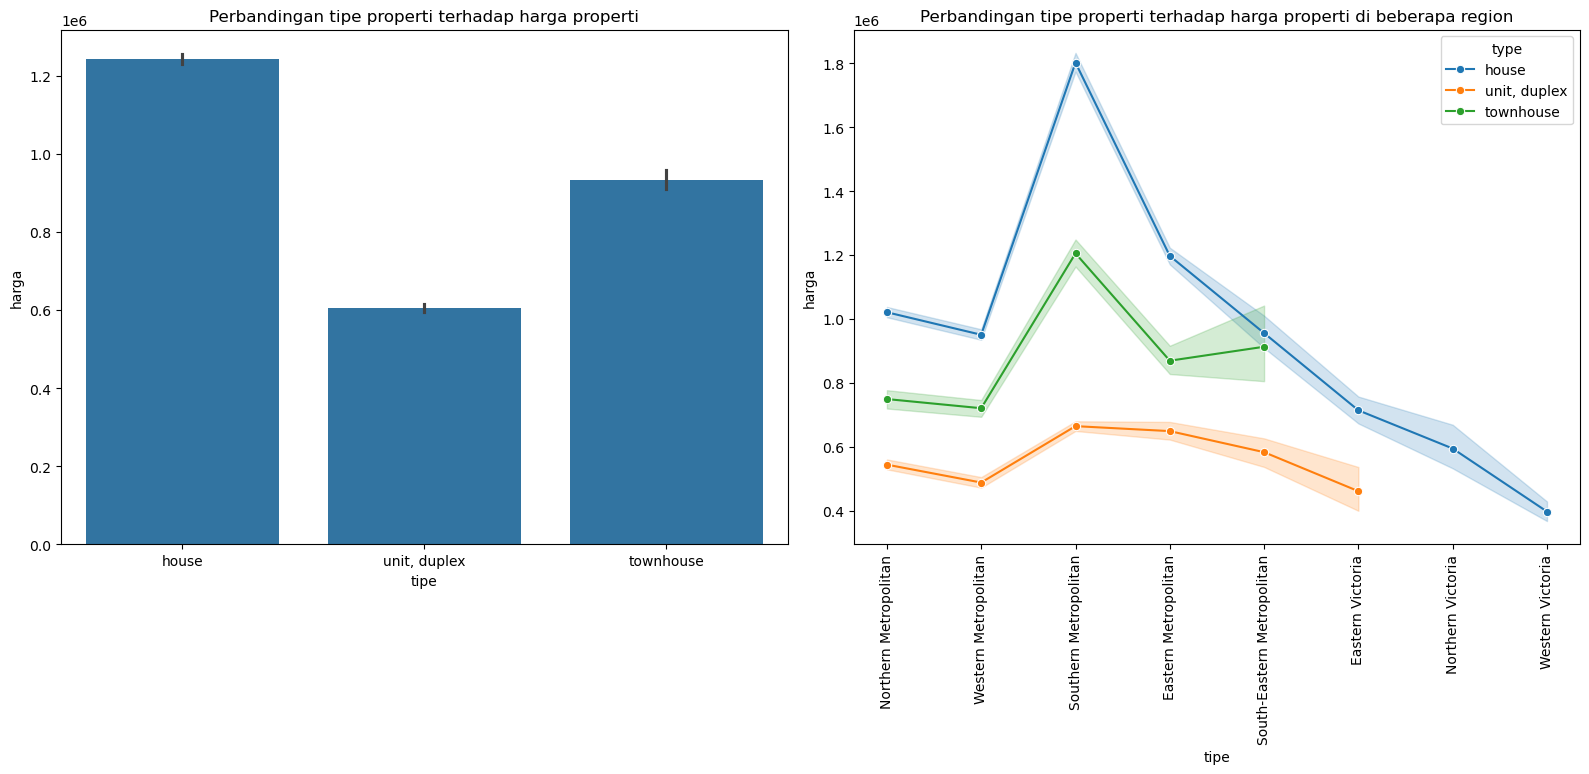

In [64]:
# Visualisasi chart
fig, ax = plt.subplots(ncols=2, figsize=(16,8))
sns.barplot(data=df, x='type', y='price', ax=ax[0])
sns.lineplot(data=df, x='region_name', y='price', hue='type', ax=ax[1], marker='o')

# Customize chart
ax[0].set(xlabel='tipe', ylabel='harga')
ax[1].set(xlabel='tipe', ylabel='harga')
ax[0].set_title('Perbandingan tipe properti terhadap harga properti');
ax[1].set_title('Perbandingan tipe properti terhadap harga properti di beberapa region')
plt.xticks(rotation=90)
plt.tight_layout();

Chart sebelah kiri menunjukkan perbandingan tipe properti terhadap harga. Dari chart tersebut terlihat bahwa harga untuk tipe properti rumah merupakan yang paling mahal dan disusul oleh townhouse dan unit/duplex. Ini menunjukkan bahwa tingginya peminat rumah dibandingkan tipe properti lainnya. Hal ini mungkin disebabkan oleh perbedaan fasilitas yang ditawarkan, privasi yang lebih terjaga, dan ketersediaan ruang yang lebih luas. 

Sedangkan chart sebelah kanan menunjukkan perbandingan tipe properti terhadap harga properti di beberapa region. Dari chart tersebut dapat terlihat bahwa properti yang paling mahal ada di Southern Metropolitan baik itu untuk tipe rumah, unit/duplex maupun townhouse. Hal ini mencerminkan tingginya permintaan untuk area metropolitan yang umumnya lebih strategis. Unit/duplex dan townhouse juga hanya tersedia di region metropolitan kecuali untuk Eastern Victoria yang memiliki unit/duplex. 

Hal ini juga sejalan dengan uji statistika yang telah dilakukan sebelumnya bahwa terdapat perbedaan signifikan antara tipe properti dengan harga properti tersebut. Statement tersebut juga didukung oleh hasil pengecekan nilai median dan mean data tersebut.

> **Sehingga dapat disimpulkan bahwa tipe properti mempengaruhi harganya.**

### 9. Bagaimana tren harga properti dari waktu ke waktu?

#### Visualisasi

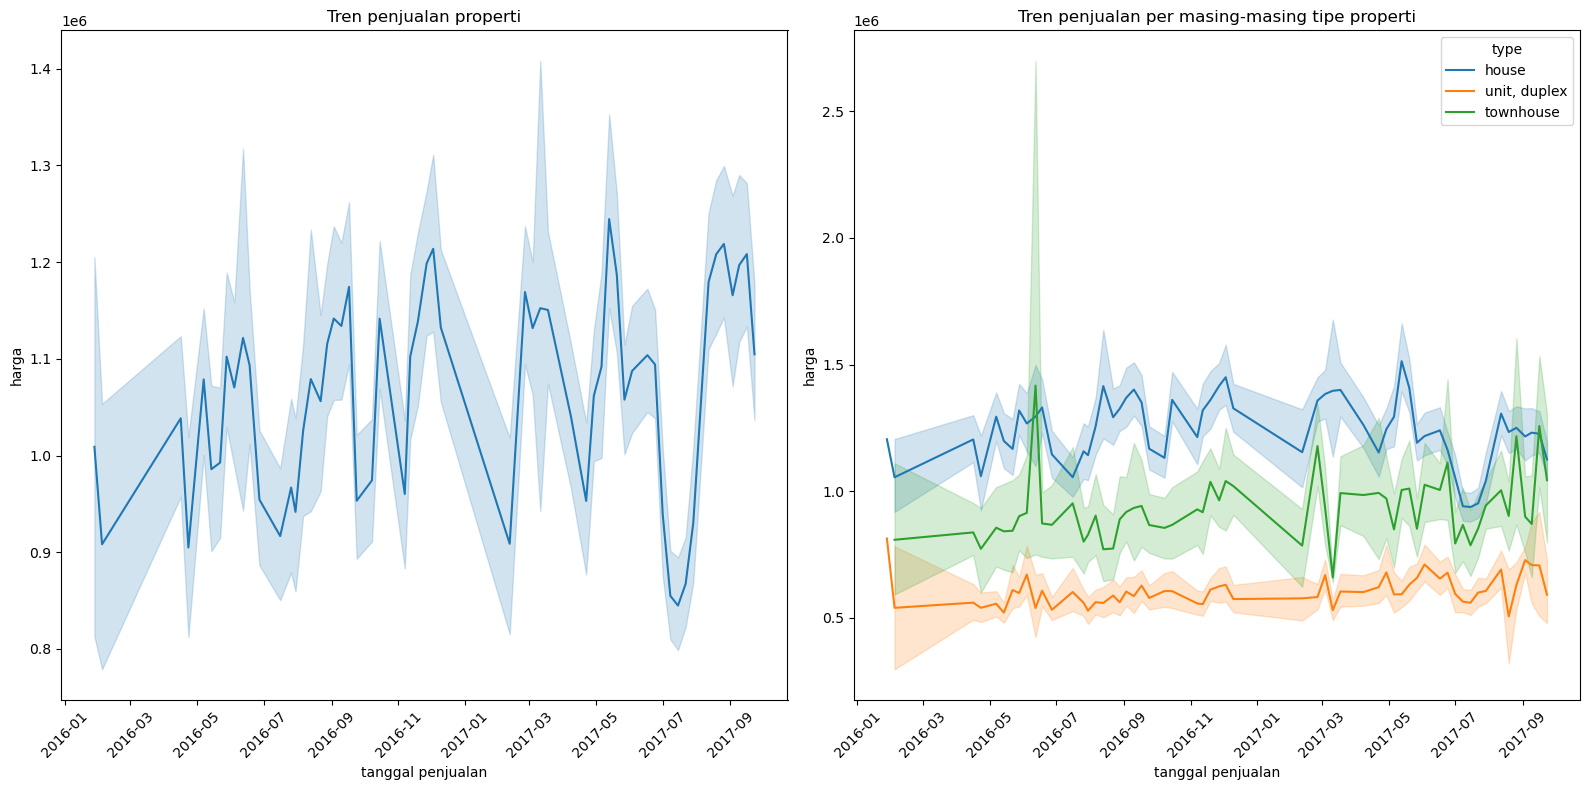

In [65]:
# Visualisai chart
fig, ax = plt.subplots(ncols=2, figsize=(16,8))
sns.lineplot(data=df, x='date', y='price', ax=ax[0])
sns.lineplot(data=df, x='date', y='price', hue='type', ax=ax[1])

# Customize chart
ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x' ,rotation=45)
ax[0].set(xlabel='tanggal penjualan', ylabel='harga')
ax[1].set(xlabel='tanggal penjualan', ylabel='harga')
ax[0].set_title('Tren penjualan properti')
ax[1].set_title('Tren penjualan per masing-masing tipe properti')
plt.tight_layout()

Chart disebelah kiri menunjukkan tren penjualan properti secara keseluruhan dari tahun 2016-2017. Chart ini menunjukkan bahwa tren penjualan properti cenderung naik dan turun, dengan puncak penjualan pada bulan Mei 2017 dan penjualan terendah pada Juli 2017. Fluktuasi ini mungkin dipengaruhi oleh berbagai faktor, seperti kondisi pasar, perubahan kebijakan pemerintah, dan musiman yang memengaruhi keputusan pembelian.

Chart disebelah kanan menunjukkan tren penjualan properti untuk berbagai jenis properti. Chart ini menunjukkan bahwa penjualan rumah cenderung lebih tinggi daripada penjualan unit/duplex dan townhouse. Hal ini mencerminkan tingginya permintaan untuk tipe rumah, yang sering kali dianggap sebagai investasi yang lebih stabil. Penjualan townhouse menunjukkan lonjakan tajam pada tahun 2016. Lonjakan ini menandakan bahwa meskipun penjualan townhouse secara keseluruhan lebih rendah dibandingkan rumah, ada periode-periode tertentu di mana tipe ini bisa sangat diminati.



### 10. Apakah ada korelasi antara harga properti dengan banyaknya properti di daerah tersebut?

#### Melakukan Uji Korelasi Kendall (Stat Inferential)

Reference: https://ademos.people.uic.edu/Chapter22.html#:~:text=2.3%20Kendall%20Correlation,-The%20Kendall%20correlation&text=It%20can%20be%20used%20with,of%20dependence%20between%20two%20variables

Dari Normality Test telah diketahui bahwa data yang dimiliki tidak terdistribusi secara normal. Uji Korelasi yang akan dilakukan menggunakan metode Kendall Correlation karena uji Korelasi Kendall dapat digunakan untuk variabel yang memiliki tipe data discrete (year) dan tipe data continuous (price). Uji korelasi Kendall terutama akan sangat disukai apabila datanya tidak terdistribusi secara normal. Dengan Confidence Level 95%, kita dapat merumuskan H0 dan H1 sebagai berikut.

Dari Normality Test telah diketahui bahwa data yang dimiliki tidak terdistribusi secara normal. Oleh karena itu, untuk mengecek korelasi antara harga properti dengan banyaknya properti lain di sekitar daerah tersebut, kita akan menggunakan Kendall Correlation karena  Kendal Correlation dapat digunakan untuk variabel yang memiliki tipe data discrete dan continue. Uji korelasi ini akan sangat disukai apabila datanya tidak terdistribusi secara normal. Dengan Confidence Level 95%, kita dapat merumuskan H0 dan H1 sebagai berikut.

> H0: Tidak ada korelasi yang signifikan antara harga properti dengan banyaknya properti di daerah tersebut. <br>
> H1: Ada korelasi yang signifikan antara harga properti dengan banyaknya properti di daerah tersebut.

In [66]:
# Mencari nilai korelasi kendall
corr, p_value = stats.kendalltau(df.property_count, df.price)

print(f'Nilai p-value sebesar {p_value:4f}')

Nilai p-value sebesar 0.273707


Berdasarkan Uji Korelasi Kendall di atas, nilai p-value > 0.05 yang berarti tidak terdapat cukup bukti untuk menolak H0. Artinya tidak ada korelasi yang signifikan antara antara harga properti dengan banyaknya properti di daerah tersebut. Ini mengindikasikan bahwa jumlah properti di suatu area tidak secara langsung mempengaruhi harga properti.

#### Visualisasi

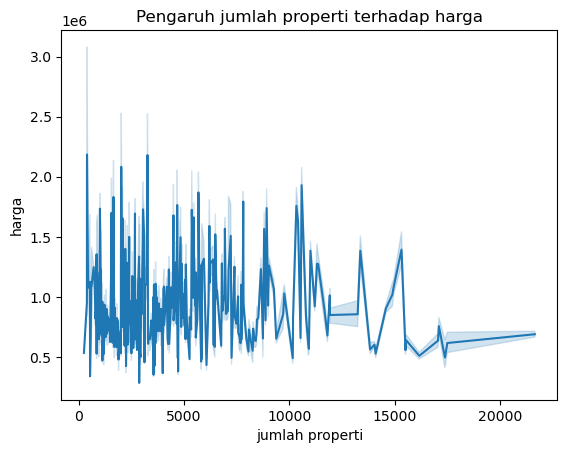

In [67]:
# Visualisasi chart
ax = sns.lineplot(data=df, x='property_count', y='price')

# Customize chart
ax.set(xlabel='jumlah properti', ylabel='harga')
ax.set_title('Pengaruh jumlah properti terhadap harga');


Dari visualisasi juga terlihat bahwa tidak terlihat korelasi antara harga properti dengan jumlah properti disekitarnya.

> **Sehingga dapat disimpulkan bahwa banyaknya properti di sekitar area tersebut tidak mempengaruhi harga properti**

# 6. Kesimpulan

Analisis terhadap faktor-faktor yang mempengaruhi harga properti di Melbourne selama tahun 2015-2016 menunjukkan bahwa karakteristik fisik, geografis, dan faktor memiliki pengaruh signifikan terhadap nilai properti.

1.	Faktor Fisik:
    Jumlah kamar tidur dan kamar mandi terbukti memiliki hubungan positif dengan harga properti; semakin banyak jumlah ruangan, semakin tinggi harga yang dapat dicapai. Luas tanah dan luas bangunan menunjukkan pengaruh yang kuat terhadap harga, dengan nilai yang lebih tinggi seiring dengan meningkatnya ukuran properti. Selain itu, semakin baru suatu properti, maka akan semakin murah harganya. Hal ini disebabkan karena umumnya bangunan yang berusia tua berada di lokasi yang strategis.

2.	Faktor Geografis:
    Distribusi harga properti sangat dipengaruhi oleh faktor lokasi. Region Metropolitan memiliki harga properti yang lebih mahal dibandingkan dengan region Victoria. Selain itu, jarak properti dengan Central Business District (CBD) berkontribusi pada peningkatan harga. Properti yang lebih dekat dengan CBD umumnya lebih mahal mencerminkan permintaan tinggi di area tersebut.

3.	Faktor Lainnya:
    Uji perbedaan harga antar tipe properti menunjukkan bahwa terdapat variasi harga yang signifikan berdasarkan jenis properti. Tren harga properti berfluktuasi dari waktu ke waktu, yang dapat dipengaruhi oleh faktor-faktor eksternal seperti kondisi ekonomi dan perubahan preferensi pasar. 

Dari analisis ini, perusahaan dapat menyimpulkan bahwa pemahaman mendalam mengenai interaksi antara berbagai faktor tersebut sangat penting untuk mengoptimalkan strategi marketing. Dengan menggunakan business metrics yang tepat, seperti Average Selling Price (ASP), Days on Market, dan Return on Cost, perusahaan dapat mengambil keputusan yang lebih strategis untuk meningkatkan profitabilitas dan daya saing di pasar jual beli properti. Melalui analisis yang komprehensif ini, diharapkan perusahaan dapat merespons perubahan dinamis dalam pasar properti dan memenuhi kebutuhan serta harapan pelanggan secara lebih efektif.